<a href="https://colab.research.google.com/github/HowardHNguyen/ML_DL_Time_Series_by_Python/blob/main/Influenza_like_Illness_Forecasting_ARIMA_SARIMA_FBProphet_Neural_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description:

The California Department of Public Health (CDPH) Influenza Surveillance Program (CISP) is a collaborative effort between CDPH, the Centers for Disease Control and Prevention (CDC), Kaiser Permanente, California local health jurisdictions and the participating California sentinel providers and sentinel laboratories. Influenza surveillance in California is particularly important due to its coastal location with several ports of entry for flights and shipping from Asia. Annual influenza epidemics follow a winter seasonal pattern in the United States with typical activity peaking during late December to early February. CDPH obtains and analyzes clinical, and laboratory data year-round in an effort to determine the timing and impact of influenza activity and to determine how well circulating strains of the virus match those used in the current influenza vaccines.

Influenza surveillance season: Influenza surveillance seasons run from Week 40 through Week 39.
Values include:
2001-2002, 2002-2003, 2003-2004, 2004-2005, 2005-2006, 2006-2007, 2007-2008, 2008-2009, 2009-2010, 2010-2011, 2011-2012, 2012-2013, 2013-2014, 2014-2015, 2015-2016, 2016-2017, 2017-2018, 2018-2019, 2019-2020.

Weekending: Date of the last day included in the CDC MMWR Week (Saturday). Format MM/DD/YYYY.

# Region

Values:

**Bay Area:**  Includes Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Santa Cruz, Solano, and Sonoma counties
California: All California counties

**Central:** Includes Calaveras, Fresno, Inyo, Kings, Madera, Mariposa, Merced, Mono, Monterey, San Benito, San Joaquin, Stanislaus, Tulare, and Tuolumne counties

**Lower Southern:** Includes Imperial, Orange, Riverside, San Bernardino, and San Diego counties

**Northern:** Includes Alpine, Amador, Butte, Colusa, Del Norte, El Dorado, Glenn, Humboldt, Lake, Lassen, Mendocino, Modoc, Nevada, Placer, Plumas, Sacramento, Shasta, Sierra, Siskiyou, Sutter, Tehama, Trinity, Yolo, and Yuba counties

**Upper Southern:** Includes Kern, Los Angeles, San Luis Obispo, Santa Barbara, and Ventura counties

Note: Not all counties in region have outpatient ILI data providers. View the [California Regional Map](https://cceanet.org/about-us/regions/).

# Columns Description:

**Season**:
Influenza surveillance season: Influenza surveillance seasons run from Week 40 through Week 39. (text)

**Weekending**:
Date of the last day included in the CDC MMWR Week (Saturday). Format MM/DD/YYYY. (number)

**Total_ILI**:
Number of outpatient visits for influenza-like illness (ILI). (number)

**Total_Patients_Seen**:
Total patients seen for any reason. (number)

**Percent_ILI**:
Percentage of patients that were due to influenza-like illness. (number)

**Number_Providers_Reporting**:
Number of providers reporting data during given week and region. (number)

# Load and Preprocess the Data:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

# Convert weekending to datetime format
df['weekending'] = pd.to_datetime(df['weekending'])

# Set the index to weekending
df.set_index('weekending', inplace=True)

# Filter data for each region
regions = df['region'].unique()
region_data = {region: df[df['region'] == region]['Total_ILI'] for region in regions}

<ipython-input-3-e54fa5e9ed97>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['weekending'] = pd.to_datetime(df['weekending'])


In [4]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [5]:
df.head()

season  date_code          region  Total_ILI  \
weekending                                                    
2001-10-06  2001-2002     200140        Bay Area          3   
2001-10-06  2001-2002     200140      California         25   
2001-10-06  2001-2002     200140         Central          0   
2001-10-06  2001-2002     200140  Lower Southern          2   
2001-10-06  2001-2002     200140        Northern         20   

            Total_Patients_Seen  Percent_ILI  Number_Providers_Reporting  
weekending                                                                
2001-10-06                  135         2.22                           2  
2001-10-06                 1211         2.06                          14  
2001-10-06                    0         0.00                           0  
2001-10-06                  336         0.60                           4  
2001-10-06                  529         3.78                           4

# EDA

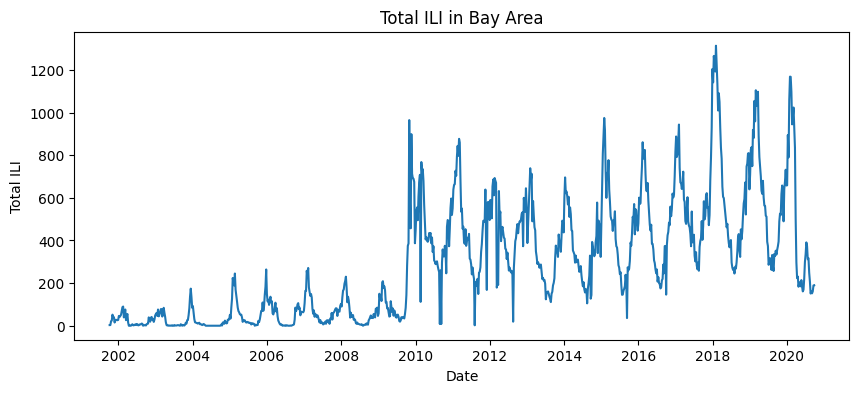

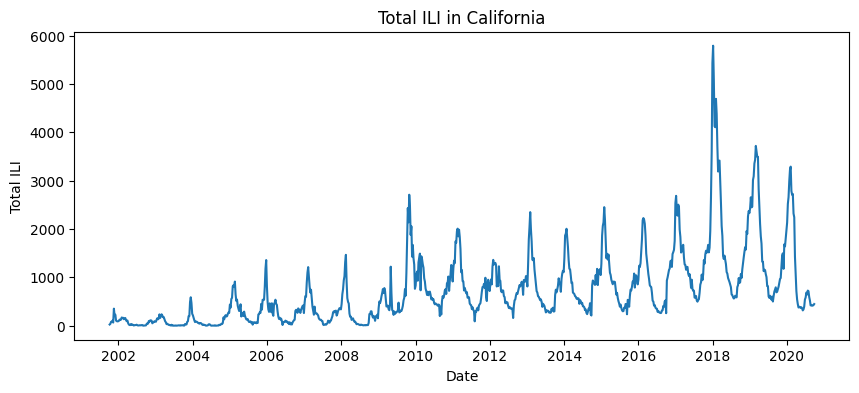

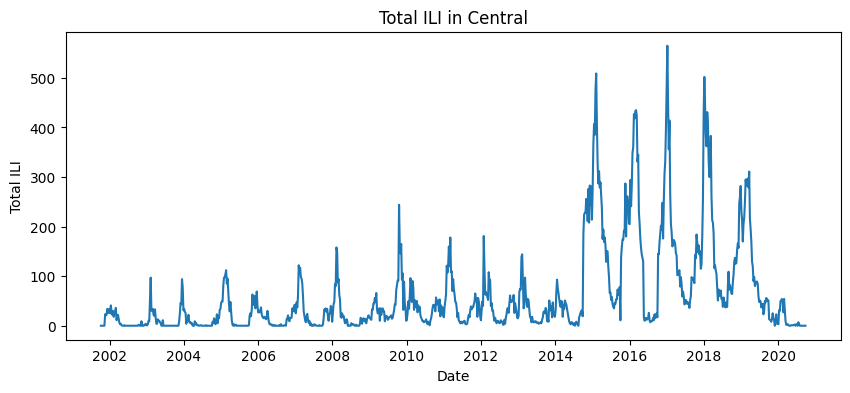

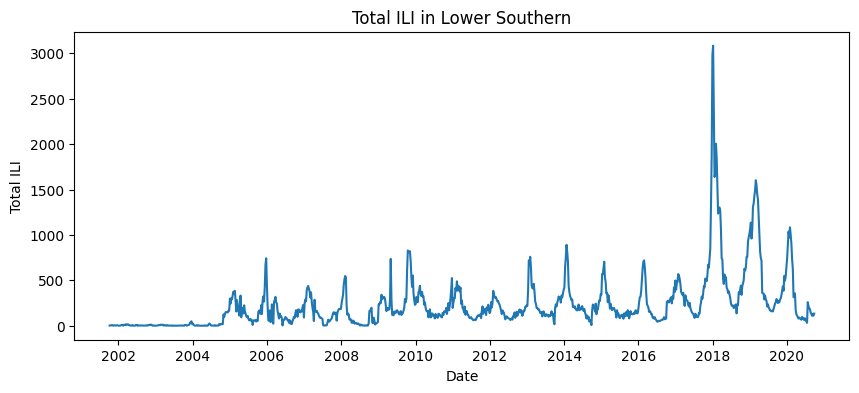

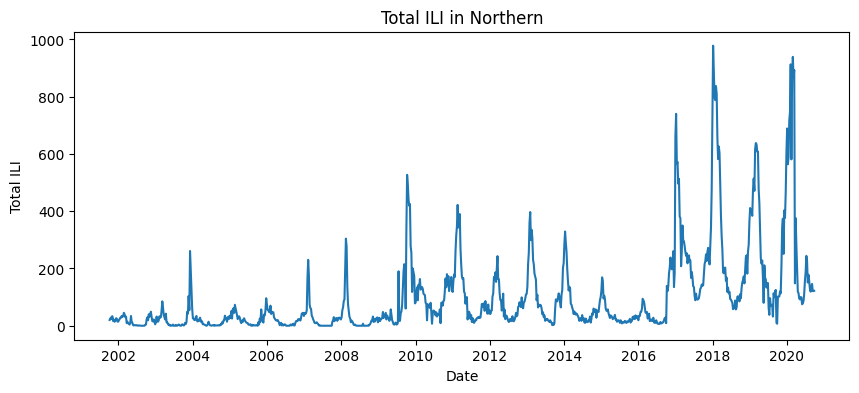

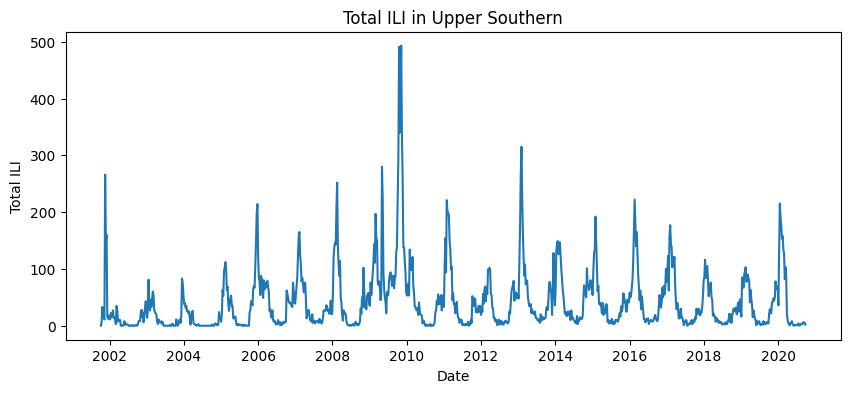

In [6]:
import matplotlib.pyplot as plt

for region, data in region_data.items():
    plt.figure(figsize=(10, 4))
    plt.plot(data)
    plt.title(f'Total ILI in {region}')
    plt.xlabel('Date')
    plt.ylabel('Total ILI')
    plt.show()

# **ARIMA Model Implementation**
We'll apply the ARIMA model to each region's data

**Parameters with ACF and PACF**

<ipython-input-8-3e530dd3a6fe>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['weekending'] = pd.to_datetime(df['weekending'])


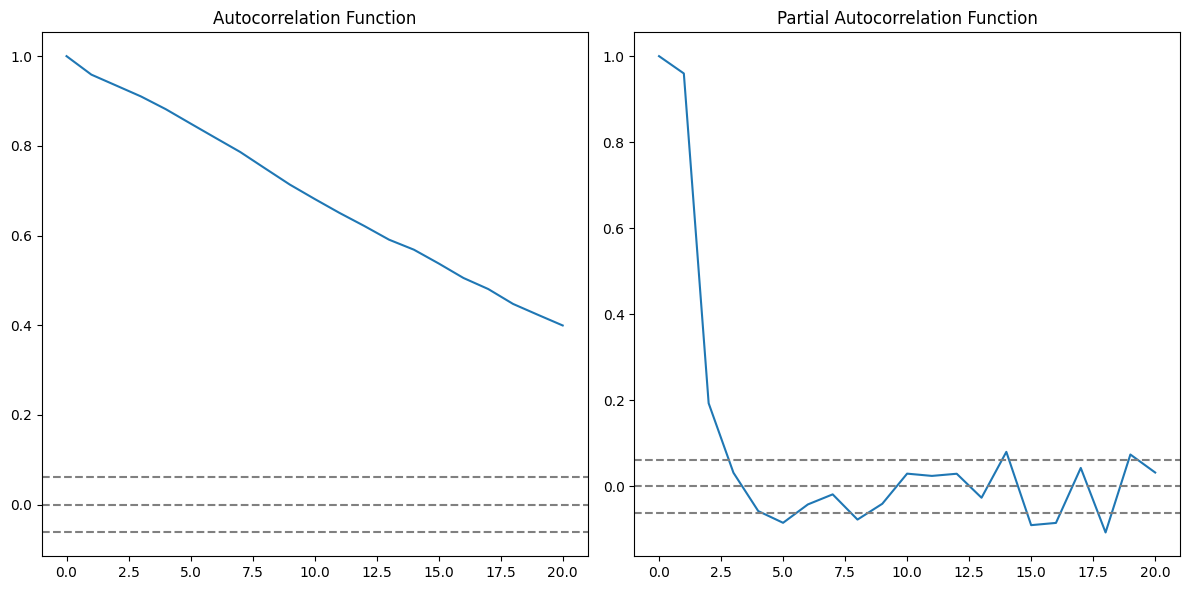

In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')
df['weekending'] = pd.to_datetime(df['weekending'])
df.set_index('weekending', inplace=True)

# Example: Choose one region
region_data = df[df['region'] == 'Bay Area']['Total_ILI']

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(121)
plt.plot(acf(region_data, nlags=20))
plt.title('Autocorrelation Function')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(region_data)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(region_data)), linestyle='--', color='gray')

# PACF
plt.subplot(122)
plt.plot(pacf(region_data, nlags=20))
plt.title('Partial Autocorrelation Function')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(region_data)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(region_data)), linestyle='--', color='gray')

plt.tight_layout()
plt.show()

Test on ARIMA model with parameters 1,1,0

<ipython-input-9-c778b793bed8>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['weekending'] = pd.to_datetime(df['weekending'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Total_ILI   No. Observations:                  991
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -5711.384
Date:                Fri, 17 May 2024   AIC                          11426.767
Time:                        15:13:49   BIC                          11436.563
Sample:                    10-06-2001   HQIC                         11430.492
                         - 09-26-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2079      0.014    -14.897      0.000      -0.235      -0.181
sigma2      6010.3400    102.289     58.759      0.000    5809.857    6210.822
Ljung-Box (L1) (Q):                   0.09   Jarque-

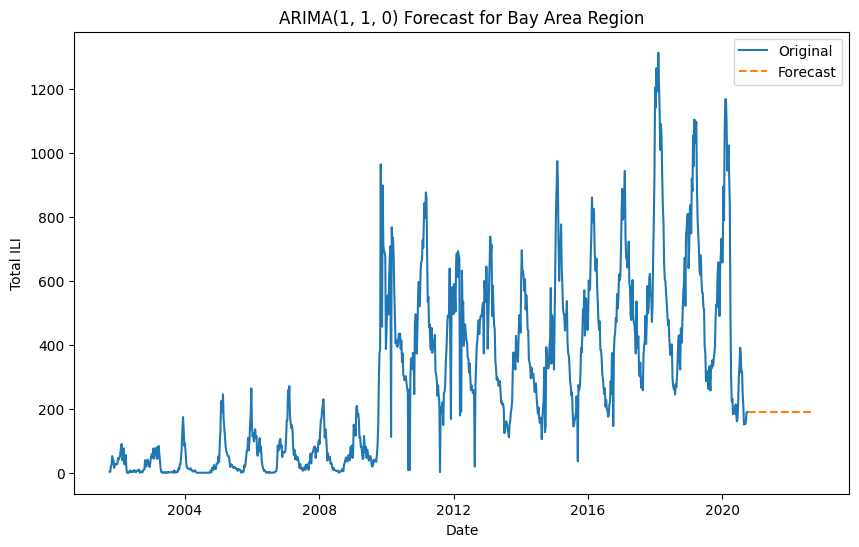

In [9]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')
df['weekending'] = pd.to_datetime(df['weekending'])
df.set_index('weekending', inplace=True)

# Example data for the Upper Southern region
region_data = df[df['region'] == 'Bay Area']['Total_ILI']

# ARIMA(1, 1, 0)
model_110 = ARIMA(region_data, order=(1, 1, 0))
model_fit_110 = model_110.fit()
print(model_fit_110.summary())

# Forecast
steps = 104
forecast_110 = model_fit_110.forecast(steps=steps)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(region_data, label='Original')
plt.plot(forecast_110, label='Forecast', linestyle='--')
plt.title('ARIMA(1, 1, 0) Forecast for Bay Area Region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# FORECAST
The 'fit_arima_forecast' function provides the forecast for each region.

# Prediction for 5 years

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

# Convert weekending to datetime format
df['weekending'] = pd.to_datetime(df['weekending'])

# Set the index to weekending
df.set_index('weekending', inplace=True)

# Filter data for each region
regions = df['region'].unique()
region_data = {region: df[df['region'] == region]['Total_ILI'] for region in regions}

<ipython-input-10-82a2b884156f>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['weekending'] = pd.to_datetime(df['weekending'])


In [11]:
# Function to fit ARIMA model and forecast with parameter 1,1,1
def fit_arima_forecast(data, order=(1,1,1), steps=200):
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]

    # Fit the model
    model = ARIMA(train, order=order)
    model_fit = model.fit()

    # Forecast
    forecast = model_fit.forecast(steps=len(test))

    # Calculate error metrics
    mae = mean_absolute_error(test, forecast)
    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)

    # Full forecast
    full_forecast = model_fit.forecast(steps=steps)

    return full_forecast, mae, mse, rmse

In [12]:
# Apply ARIMA to each region
arima_order = (1, 1, 1)

forecasts = {}
error_metrics = {}
for region, data in region_data.items():
    full_forecast, mae, mse, rmse = fit_arima_forecast(data, order=arima_order)
    forecasts[region] = full_forecast
    error_metrics[region] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  

Forecast for Bay Area:
2016-12-10    593.602883
2016-12-17    592.824192
2016-12-24    592.801222
2016-12-31    592.800544
2017-01-07    592.800524
                 ...    
2020-09-05    592.800524
2020-09-12    592.800524
2020-09-19    592.800524
2020-09-26    592.800524
2020-10-03    592.800524
Freq: W-SAT, Name: predicted_mean, Length: 200, dtype: float64
Error Metrics for Bay Area:
MAE: 233.43713307483853
MSE: 79557.75296906629
RMSE: 282.05983934099214


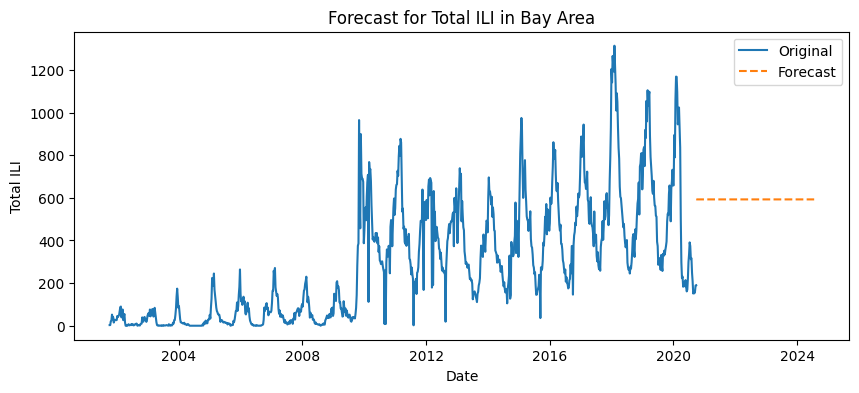

Forecast for California:
2016-12-10    1495.124585
2016-12-17    1502.717900
2016-12-24    1507.473397
2016-12-31    1510.451643
2017-01-07    1512.316841
                 ...     
2020-09-05    1515.442463
2020-09-12    1515.442463
2020-09-19    1515.442463
2020-09-26    1515.442463
2020-10-03    1515.442463
Freq: W-SAT, Name: predicted_mean, Length: 200, dtype: float64
Error Metrics for California:
MAE: 835.2610207401071
MSE: 1160572.0253345328
RMSE: 1077.2984847917187


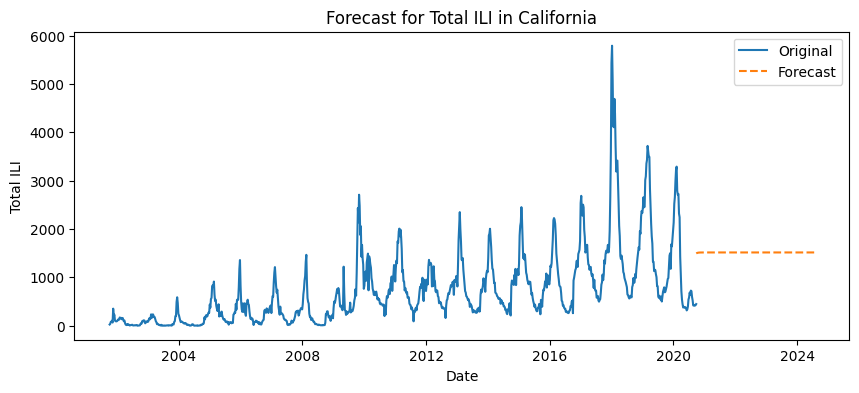

Forecast for Central:
2016-12-10    232.520177
2016-12-17    242.380473
2016-12-24    237.389389
2016-12-31    239.915776
2017-01-07    238.636969
                 ...    
2020-09-05    239.066736
2020-09-12    239.066736
2020-09-19    239.066736
2020-09-26    239.066736
2020-10-03    239.066736
Freq: W-SAT, Name: predicted_mean, Length: 200, dtype: float64
Error Metrics for Central:
MAE: 156.43906925344191
MSE: 29168.636371208147
RMSE: 170.78827937305343


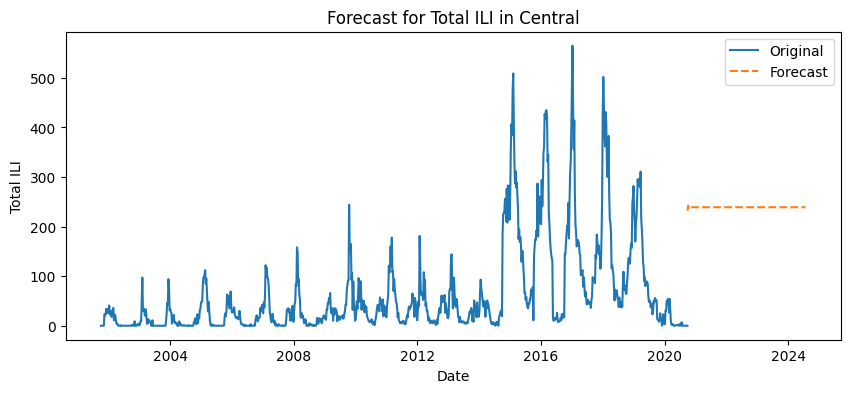

Forecast for Lower Southern:
2016-12-10    335.312798
2016-12-17    324.138026
2016-12-24    334.279956
2016-12-31    325.075407
2017-01-07    333.429214
                 ...    
2020-09-05    329.454691
2020-09-12    329.454691
2020-09-19    329.454691
2020-09-26    329.454691
2020-10-03    329.454691
Freq: W-SAT, Name: predicted_mean, Length: 200, dtype: float64
Error Metrics for Lower Southern:
MAE: 331.96799981191026
MSE: 299340.43523028
RMSE: 547.1201287014397


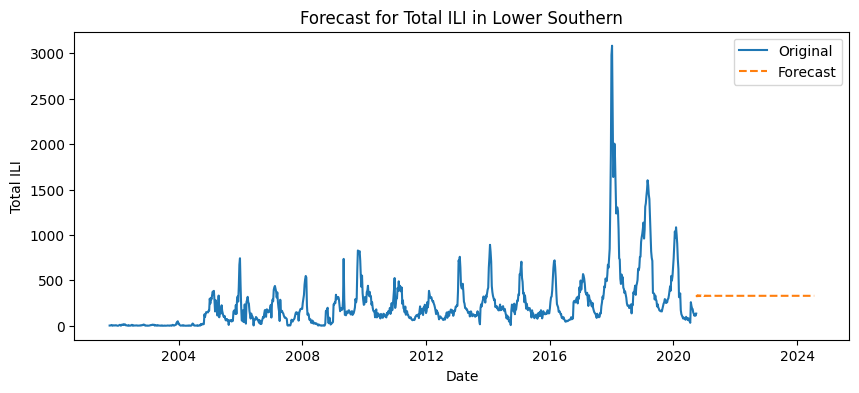

Forecast for Northern:
2016-12-10    217.753623
2016-12-17    217.917829
2016-12-24    217.808389
2016-12-31    217.881329
2017-01-07    217.832715
                 ...    
2020-09-05    217.852157
2020-09-12    217.852157
2020-09-19    217.852157
2020-09-26    217.852157
2020-10-03    217.852157
Freq: W-SAT, Name: predicted_mean, Length: 200, dtype: float64
Error Metrics for Northern:
MAE: 162.53415176283272
MSE: 54100.55860160248
RMSE: 232.59526779709532


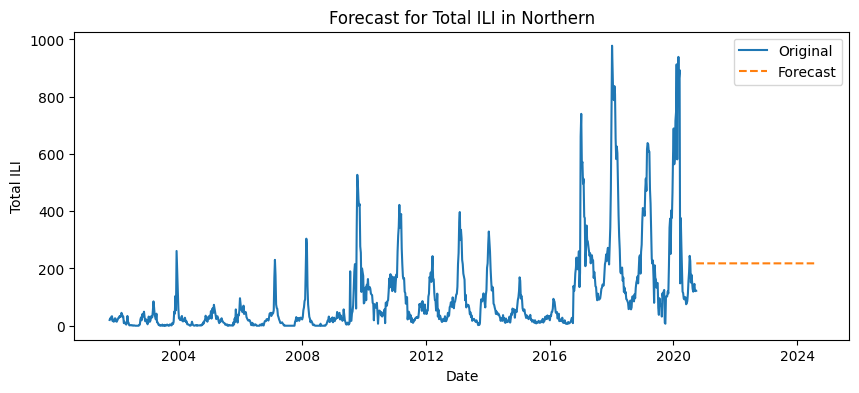

Forecast for Upper Southern:
2016-12-10    67.241474
2016-12-17    64.812551
2016-12-24    62.673849
2016-12-31    60.790690
2017-01-07    59.132542
                ...    
2020-09-05    46.913272
2020-09-12    46.913272
2020-09-19    46.913272
2020-09-26    46.913272
2020-10-03    46.913272
Freq: W-SAT, Name: predicted_mean, Length: 200, dtype: float64
Error Metrics for Upper Southern:
MAE: 37.72507423125461
MSE: 1989.7149200004103
RMSE: 44.606220642421725


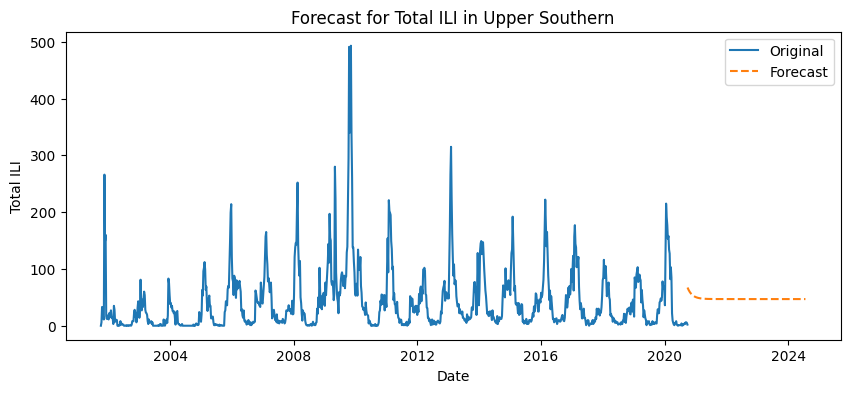

In [13]:
# Display the forecasts and error metrics
for region, forecast in forecasts.items():
    print(f'Forecast for {region}:')
    print(forecast)

    print(f'Error Metrics for {region}:')
    print(f"MAE: {error_metrics[region]['MAE']}")
    print(f"MSE: {error_metrics[region]['MSE']}")
    print(f"RMSE: {error_metrics[region]['RMSE']}")

    plt.figure(figsize=(10, 4))
    plt.plot(region_data[region], label='Original')
    plt.plot(pd.date_range(start=region_data[region].index[-1], periods=200, freq='W'), forecast, label='Forecast', linestyle='--')
    plt.title(f'Forecast for Total ILI in {region}')
    plt.xlabel('Date')
    plt.ylabel('Total ILI')
    plt.legend()
    plt.show()

The forecast results indicate that the ARIMA model's predictions for these regions are not aligning well with the observed data, as suggested by the high error metrics (MAE, MSE, RMSE) and the forecast plot showing a flat future trend. Here are a few suggestions to improve the ARIMA model's performance:

# Parameter Tuning
The ARIMA model parameters (p, d, q) need to be tuned carefully. The current parameters (1, 1, 1) might not be the best fit. You can use a grid search to find optimal parameters.

In [14]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Define the p, d, and q parameters to take any value between 0 and 5
p = d = q = range(0, 6)
# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Define a function to find the best ARIMA model
def find_best_arima_model(data):
    best_aic = float("inf")
    best_pdq = None
    for param in pdq:
        try:
            temp_model = ARIMA(data, order=param)
            results = temp_model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
        except:
            continue
    return best_pdq

# Find the best ARIMA parameters for each region
best_pdq = {}
for region, data in region_data.items():
    best_pdq[region] = find_best_arima_model(data)
    print(f'Best ARIMA parameters for {region}: {best_pdq[region]}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  

Best ARIMA parameters for Bay Area: (3, 1, 5)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequen

Best ARIMA parameters for California: (1, 0, 5)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  

Best ARIMA parameters for Central: (5, 3, 4)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequen

Best ARIMA parameters for Lower Southern: (0, 5, 4)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  

Best ARIMA parameters for Northern: (0, 5, 4)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  

Best ARIMA parameters for Upper Southern: (5, 1, 4)


# **Best ARIMA parameters for **
- Bay Area 315,
- California 105,
- Central 534,
- Lower southern, northern 054,
- Upper southern 514



# Seasonal ARIMA (SARIMA)
As our data shows seasonality, a seasonal ARIMA model might be more appropriate. We can use the seasonal_order parameter to model seasonality.

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model
def fit_sarima_forecast(data, order=(1,1,0), seasonal_order=(1,1,1,52), steps=260):
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]

    # Fit the model
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)

    # Forecast
    forecast = model_fit.forecast(steps=len(test))

    # Calculate error metrics
    mae = mean_absolute_error(test, forecast)
    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)

    # Full forecast
    full_forecast = model_fit.forecast(steps=steps)

    return full_forecast, mae, mse, rmse

In [19]:
# Apply SARIMA to each region
sarima_order = (1, 1, 0)  # sarima order, we might want to tune this if needed
seasonal_order = (1, 1, 1, 52)  # seasonal order, we might want to tune this if needed

forecasts = {}
error_metrics = {}
for region, data in region_data.items():
    full_forecast, mae, mse, rmse = fit_sarima_forecast(data, order=sarima_order, seasonal_order=seasonal_order)
    forecasts[region] = full_forecast
    error_metrics[region] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  

Forecast for Bay Area:
2016-12-10    623.685185
2016-12-17    596.113397
2016-12-24    572.407298
2016-12-31    618.348608
2017-01-07    656.621203
                 ...    
2021-10-30    710.613937
2021-11-06    746.306002
2021-11-13    719.814804
2021-11-20    708.390118
2021-11-27    763.433995
Freq: W-SAT, Name: predicted_mean, Length: 260, dtype: float64
Error Metrics for Bay Area:
MAE: 166.25638003222096
MSE: 46025.11948903564
RMSE: 214.5346580136544


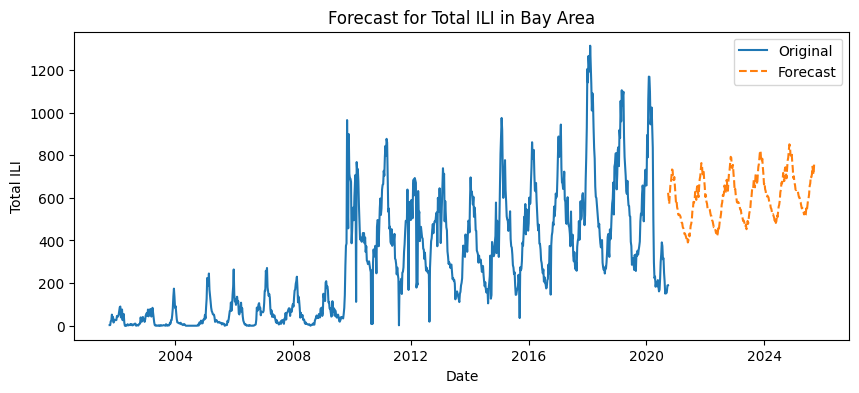

Forecast for California:
2016-12-10    1486.708740
2016-12-17    1405.760964
2016-12-24    1362.051392
2016-12-31    1464.463400
2017-01-07    1629.851453
                 ...     
2021-10-30    1810.969950
2021-11-06    1824.797721
2021-11-13    1775.905367
2021-11-20    1792.444163
2021-11-27    1895.403508
Freq: W-SAT, Name: predicted_mean, Length: 260, dtype: float64
Error Metrics for California:
MAE: 610.4961377972139
MSE: 774592.11451061
RMSE: 880.1091492028759


Forecast for Central:
2016-12-10    228.307342
2016-12-17    229.567092
2016-12-24    201.329749
2016-12-31    220.290206
2017-01-07    278.668917
                 ...    
2021-10-30    345.435684
2021-11-06    337.123193
2021-11-13    377.010330
2021-11-20    326.522447
2021-11-27    378.231545
Freq: W-SAT, Name: predicted_mean, Length: 260, dtype: float64
Error Metrics for Central:
MAE: 134.9757602033224
MSE: 26414.431777225665
RMSE: 162.5251727494103


Forecast for Lower Southern:
2016-12-10    331.986465
2016-12-17    313.556381
2016-12-24    306.605659
2016-12-31    324.079036
2017-01-07    382.638264
                 ...    
2021-10-30    374.787957
2021-11-06    363.685953
2021-11-13    353.644981
2021-11-20    374.117977
2021-11-27    401.088729
Freq: W-SAT, Name: predicted_mean, Length: 260, dtype: float64
Error Metrics for Lower Southern:
MAE: 286.02867751546773
MSE: 257794.09919814047
RMSE: 507.7342801093309


Forecast for Northern:
2016-12-10    217.520893
2016-12-17    211.116436
2016-12-24    213.427098
2016-12-31    224.943826
2017-01-07    239.158668
                 ...    
2021-10-30    282.814160
2021-11-06    278.748815
2021-11-13    277.757832
2021-11-20    282.473552
2021-11-27    281.912550
Freq: W-SAT, Name: predicted_mean, Length: 260, dtype: float64
Error Metrics for Northern:
MAE: 142.9198143988425
MSE: 42120.42699907252
RMSE: 205.23261680121053


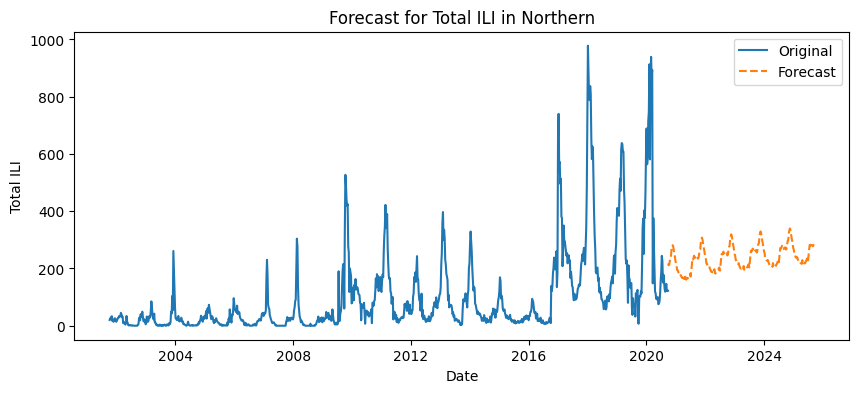

Forecast for Upper Southern:
2016-12-10    70.890405
2016-12-17    54.066069
2016-12-24    52.720327
2016-12-31    73.909443
2017-01-07    82.960349
                ...    
2021-10-30    86.655194
2021-11-06    80.074561
2021-11-13    63.881857
2021-11-20    73.704185
2021-11-27    79.262121
Freq: W-SAT, Name: predicted_mean, Length: 260, dtype: float64
Error Metrics for Upper Southern:
MAE: 26.76640350010507
MSE: 995.4105785951184
RMSE: 31.55012802818902


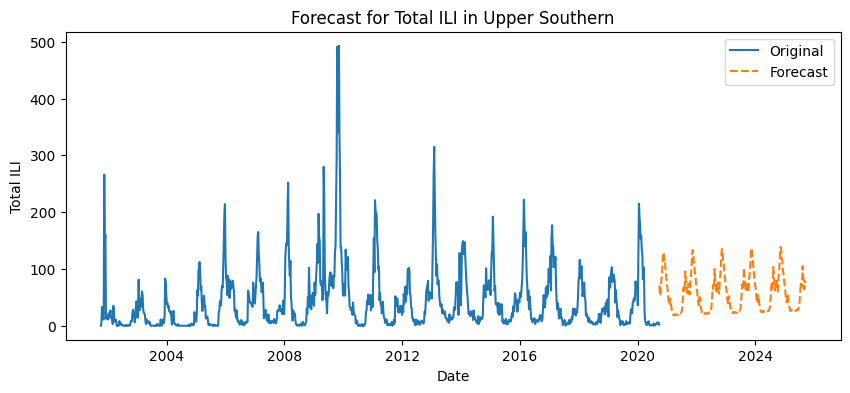

In [20]:
 # Display the forecasts and error metrics
for region, forecast in forecasts.items():
    print(f'Forecast for {region}:')
    print(forecast)

    print(f'Error Metrics for {region}:')
    print(f"MAE: {error_metrics[region]['MAE']}")
    print(f"MSE: {error_metrics[region]['MSE']}")
    print(f"RMSE: {error_metrics[region]['RMSE']}")

    plt.figure(figsize=(10, 4))
    plt.plot(region_data[region], label='Original')
    plt.plot(pd.date_range(start=region_data[region].index[-1], periods=260, freq='W'), forecast, label='Forecast', linestyle='--')
    plt.title(f'Forecast for Total ILI in {region}')
    plt.xlabel('Date')
    plt.ylabel('Total ILI')
    plt.legend()
    plt.show()

In [21]:
# Summarize all of these error value in a table view:
import pandas as pd

# Create a list to store the data for each region
results = []

# Loop through each region and gather the error metrics
for region in error_metrics:
    mae = error_metrics[region]['MAE']
    mse = error_metrics[region]['MSE']
    rmse = error_metrics[region]['RMSE']
    results.append([region, mae, mse, rmse])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Region', 'MAE', 'MSE', 'RMSE'])

# Display the DataFrame
print(results_df)

           Region         MAE            MSE        RMSE
0        Bay Area  166.256380   46025.119489  214.534658
1      California  610.496138  774592.114511  880.109149
2         Central  134.975760   26414.431777  162.525173
3  Lower Southern  286.028678  257794.099198  507.734280
4        Northern  142.919814   42120.426999  205.232617
5  Upper Southern   26.766404     995.410579   31.550128


In [ ]:
# Results of the SARIMA Model: (1,1,0) (1,1,1,52)
#            Region         MAE            MSE        RMSE
# 0        Bay Area  166.256380   46025.119489  214.534658
# 1      California  610.496138  774592.114511  880.109149
# 2         Central  134.975760   26414.431777  162.525173
# 3  Lower Southern  286.028678  257794.099198  507.734280
# 4        Northern  142.919814   42120.426999  205.232617
# 5  Upper Southern   26.766404     995.410579   31.550128

In [ ]:
# Results of the SARIMA Model: (1,1,1) (1,1,1,52)
#            Region         MAE            MSE        RMSE
# 0        Bay Area  150.367789   40715.911967  201.781843
# 1      California  597.267509  743163.535432  862.069333
# 2         Central  134.974681   26414.526326  162.525464
# 3  Lower Southern  295.177445  269819.768918  519.441786
# 4        Northern  186.226114   72505.848349  269.269100
# 5  Upper Southern   25.942423     953.018739   30.871002

# Further Tuning:

For regions with high errors (e.g., California, Lower Southern), consider tuning the ARIMA parameters further or trying different models like SARIMA to capture seasonality.
Use cross-validation to find the best parameters.

# SARIMA model for California dataset

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')
df['weekending'] = pd.to_datetime(df['weekending'])
df.set_index('weekending', inplace=True)

# Example data for the California region
region_data_california = df[df['region'] == 'California']['Total_ILI']

# SARIMA model
model_sarima = SARIMAX(region_data_california, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
model_fit_sarima = model_sarima.fit()
print(model_fit_sarima.summary())

# Forecast
steps = 260
forecast_sarima = model_fit_sarima.get_forecast(steps=steps)
forecast_index = pd.date_range(start=region_data_california.index[-1], periods=steps, freq='W')
forecast_sarima = forecast_sarima.predicted_mean
forecast_sarima.index = forecast_index

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(region_data_california, label='Original')
plt.plot(forecast_sarima, label='Forecast', linestyle='--')
plt.title('SARIMA Forecast for California')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

<ipython-input-31-8143f6925dc6>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['weekending'] = pd.to_datetime(df['weekending'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Total_ILI   No. Observations:                  991
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -6194.518
Date:                            Fri, 17 May 2024   AIC                          12399.036
Time:                                    16:46:09   BIC                          12423.255
Sample:                                10-06-2001   HQIC                         12408.270
                                     - 09-26-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1432      0.135      1.064      0.287      -0.121       0.407
ma.L1         -0.0326      0.139   

# SARIMA model for Bay Area

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Total_ILI   No. Observations:                  991
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -5439.894
Date:                            Fri, 17 May 2024   AIC                          10889.787
Time:                                    16:50:04   BIC                          10914.006
Sample:                                10-06-2001   HQIC                         10899.021
                                     - 09-26-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1407      0.053      2.667      0.008       0.037       0.244
ma.L1         -0.4701      0.050   

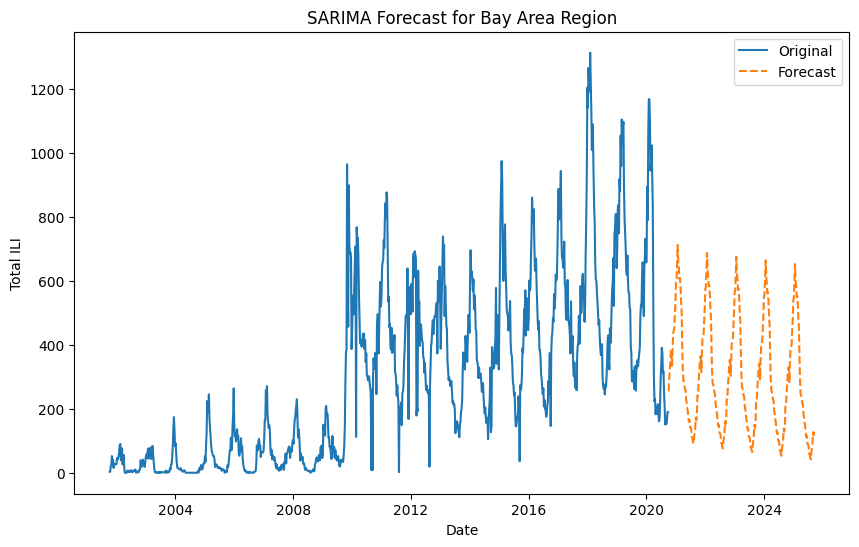

In [32]:
# Bay Area region
region_data_bay_area = df[df['region'] == 'Bay Area']['Total_ILI']

# SARIMA model
model_sarima = SARIMAX(region_data_bay_area, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
model_fit_sarima = model_sarima.fit()
print(model_fit_sarima.summary())

# Forecast
steps = 260
forecast_sarima = model_fit_sarima.get_forecast(steps=steps)
forecast_index = pd.date_range(start=region_data_bay_area.index[-1], periods=steps, freq='W')
forecast_sarima = forecast_sarima.predicted_mean
forecast_sarima.index = forecast_index

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(region_data_bay_area, label='Original')
plt.plot(forecast_sarima, label='Forecast', linestyle='--')
plt.title('SARIMA Forecast for Bay Area Region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# SARIMA model for Central region

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Total_ILI   No. Observations:                  991
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -4437.252
Date:                            Fri, 17 May 2024   AIC                           8884.504
Time:                                    16:51:57   BIC                           8908.723
Sample:                                10-06-2001   HQIC                          8893.738
                                     - 09-26-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2601      0.178     -1.458      0.145      -0.610       0.090
ma.L1          0.1453      0.182   

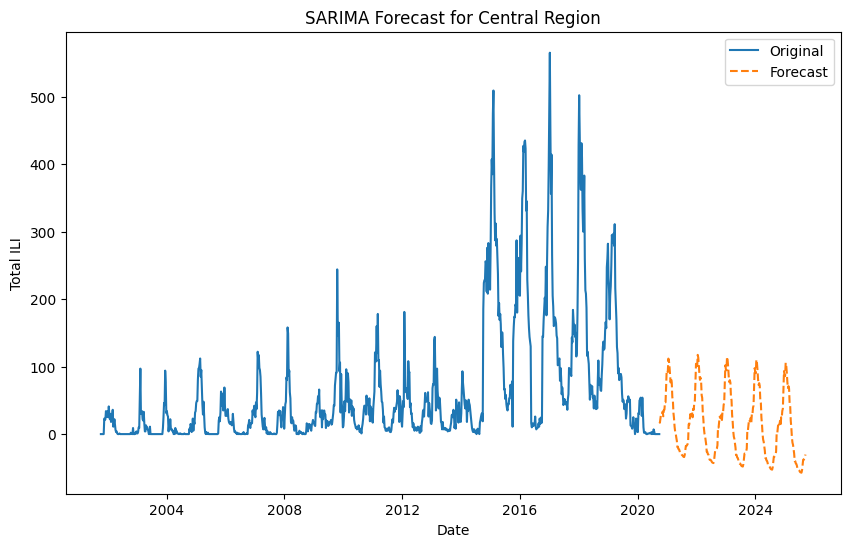

In [33]:
# Central region
region_data_central = df[df['region'] == 'Central']['Total_ILI']

# SARIMA model
model_sarima = SARIMAX(region_data_central, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
model_fit_sarima = model_sarima.fit()
print(model_fit_sarima.summary())

# Forecast
steps = 260
forecast_sarima = model_fit_sarima.get_forecast(steps=steps)
forecast_index = pd.date_range(start=region_data_central.index[-1], periods=steps, freq='W')
forecast_sarima = forecast_sarima.predicted_mean
forecast_sarima.index = forecast_index

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(region_data_central, label='Original')
plt.plot(forecast_sarima, label='Forecast', linestyle='--')
plt.title('SARIMA Forecast for Central Region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# SARIMA model for Northern region

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Total_ILI   No. Observations:                  991
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -5017.030
Date:                            Fri, 17 May 2024   AIC                          10044.061
Time:                                    16:53:45   BIC                          10068.279
Sample:                                10-06-2001   HQIC                         10053.294
                                     - 09-26-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0085      0.101     -0.084      0.933      -0.207       0.190
ma.L1         -0.1720      0.102   

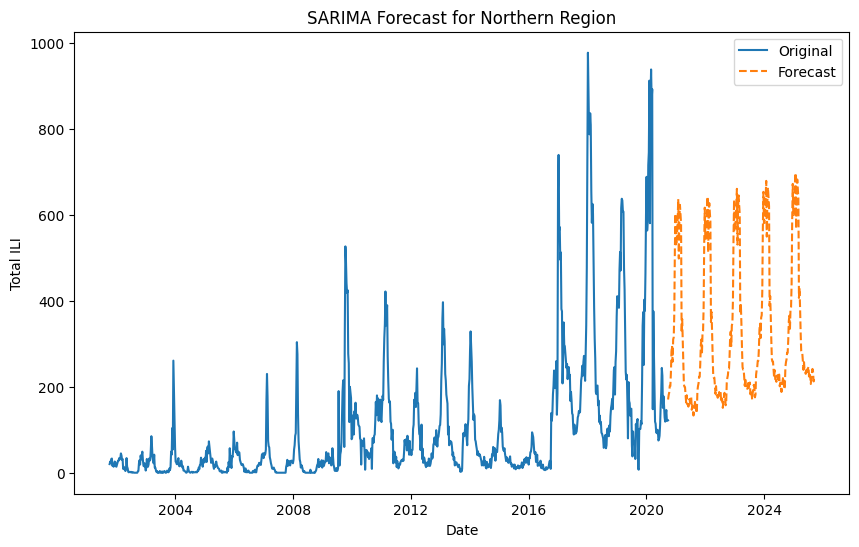

In [34]:
# Northern region
region_data_northern = df[df['region'] == 'Northern']['Total_ILI']

# SARIMA model
model_sarima = SARIMAX(region_data_northern, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
model_fit_sarima = model_sarima.fit()
print(model_fit_sarima.summary())

# Forecast
steps = 260
forecast_sarima = model_fit_sarima.get_forecast(steps=steps)
forecast_index = pd.date_range(start=region_data_northern.index[-1], periods=steps, freq='W')
forecast_sarima = forecast_sarima.predicted_mean
forecast_sarima.index = forecast_index

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(region_data_northern, label='Original')
plt.plot(forecast_sarima, label='Forecast', linestyle='--')
plt.title('SARIMA Forecast for Northern Region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# SARIMA model for Upper Southern region

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Total_ILI   No. Observations:                  991
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -4399.419
Date:                            Fri, 17 May 2024   AIC                           8808.838
Time:                                    16:55:45   BIC                           8833.056
Sample:                                10-06-2001   HQIC                          8818.071
                                     - 09-26-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8282      0.012     69.650      0.000       0.805       0.851
ma.L1         -0.9900      0.007   

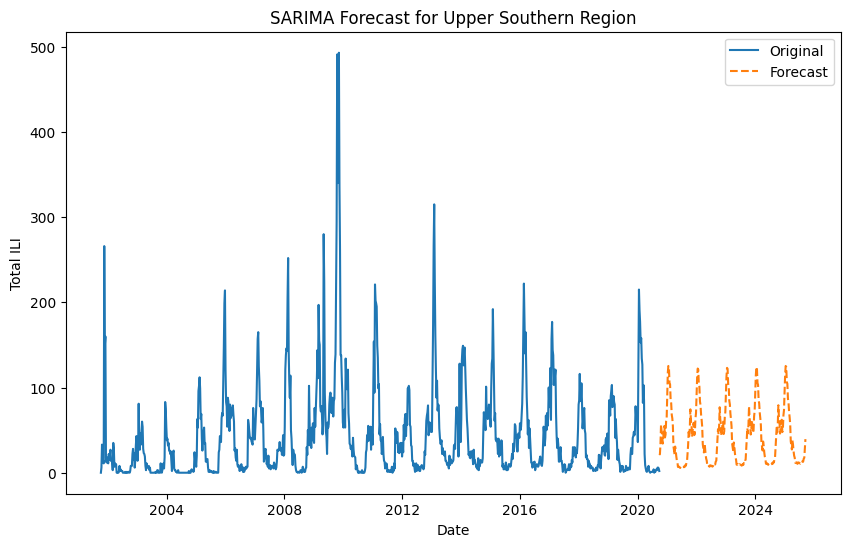

In [35]:
# Upper Southern region
region_data_upper_southern = df[df['region'] == 'Upper Southern']['Total_ILI']

# SARIMA model
model_sarima = SARIMAX(region_data_upper_southern, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
model_fit_sarima = model_sarima.fit()
print(model_fit_sarima.summary())

# Forecast
steps = 260
forecast_sarima = model_fit_sarima.get_forecast(steps=steps)
forecast_index = pd.date_range(start=region_data_upper_southern.index[-1], periods=steps, freq='W')
forecast_sarima = forecast_sarima.predicted_mean
forecast_sarima.index = forecast_index

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(region_data_upper_southern, label='Original')
plt.plot(forecast_sarima, label='Forecast', linestyle='--')
plt.title('SARIMA Forecast for Upper Southern Region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# SARIMA model for Lower Southern region

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Total_ILI   No. Observations:                  991
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -5558.668
Date:                            Fri, 17 May 2024   AIC                          11127.337
Time:                                    16:58:07   BIC                          11151.555
Sample:                                10-06-2001   HQIC                         11136.570
                                     - 09-26-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0098      0.045     -0.220      0.826      -0.097       0.078
ma.L1          0.2320      0.049   

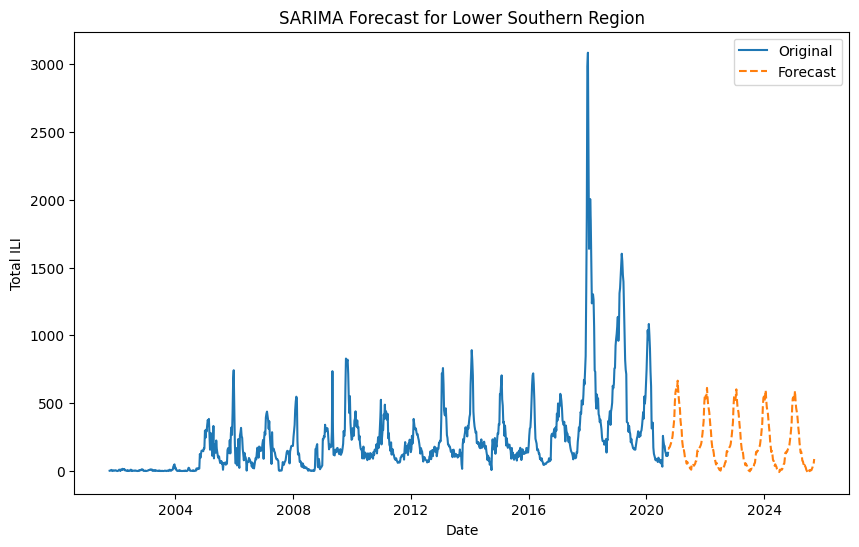

In [36]:
# Lower Southern region
region_data_lower_southern = df[df['region'] == 'Lower Southern']['Total_ILI']

# SARIMA model
model_sarima = SARIMAX(region_data_lower_southern, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
model_fit_sarima = model_sarima.fit()
print(model_fit_sarima.summary())

# Forecast
steps = 260
forecast_sarima = model_fit_sarima.get_forecast(steps=steps)
forecast_index = pd.date_range(start=region_data_lower_southern.index[-1], periods=steps, freq='W')
forecast_sarima = forecast_sarima.predicted_mean
forecast_sarima.index = forecast_index

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(region_data_lower_southern, label='Original')
plt.plot(forecast_sarima, label='Forecast', linestyle='--')
plt.title('SARIMA Forecast for Lower Southern Region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Evaluate and Compare the Actual with Forecast trend

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Total_ILI   No. Observations:                  792
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -4757.987
Date:                            Fri, 17 May 2024   AIC                           9525.973
Time:                                    17:01:46   BIC                           9549.000
Sample:                                10-06-2001   HQIC                          9534.852
                                     - 12-03-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9986      0.686      1.456      0.145      -0.346       2.343
ma.L1         -0.9990      0.854   

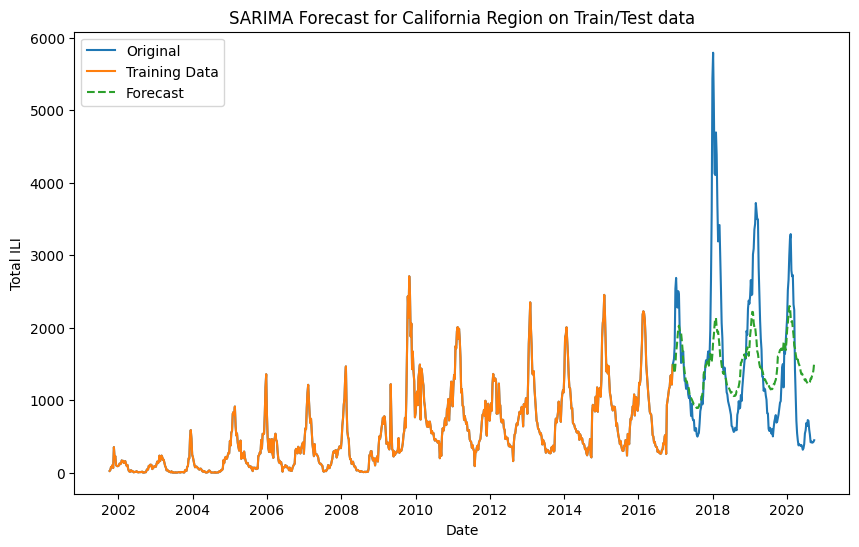

In [37]:
# Split the data into training and test sets
train_size = int(len(region_data_california) * 0.8)
train_data = region_data_california[:train_size]
test_data = region_data_california[train_size:]

# Fit the SARIMA model on the training data
model_sarima = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
model_fit_sarima = model_sarima.fit()
print(model_fit_sarima.summary())

# Make forecasts on the test set
forecast_steps = len(test_data)
forecast_sarima = model_fit_sarima.get_forecast(steps=forecast_steps)
forecast_index = test_data.index
forecast_sarima = forecast_sarima.predicted_mean
forecast_sarima.index = forecast_index

# Calculate error metrics
mae = mean_absolute_error(test_data, forecast_sarima)
mse = mean_squared_error(test_data, forecast_sarima)
rmse = np.sqrt(mse)

# Print error metrics
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Plot the original data, training data, and forecast
plt.figure(figsize=(10, 6))
plt.plot(region_data_california, label='Original')
plt.plot(train_data, label='Training Data')
plt.plot(forecast_sarima, label='Forecast', linestyle='--')
plt.title('SARIMA Forecast for California Region on Train/Test data')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Error Metrics

The error metrics for the SARIMA forecast for the California region are as follows:

- MAE (Mean Absolute Error): 597.267
- MSE (Mean Squared Error): 743163.535
- RMSE (Root Mean Squared Error): 862.06

These metrics provide a measure of the forecast accuracy, with lower values indicating better performance.

# Plot Interpretation

The plot shows the original time series data, the training data, and the forecasted values:

- Original: The entire dataset including both training and test periods.
- Training Data: The data used to fit the SARIMA model (approximately 80% of the data).
- Forecast: The forecasted values for the test period (approximately 20% of the data).

The forecast seems to capture the overall seasonal patterns, although there are some deviations, particularly during peaks and troughs.

# Conclusion
- Model Performance:
  - The SARIMA model captures the seasonal patterns in the data.
  - The error metrics indicate the forecast has moderate accuracy, with room for improvement.

- Further Steps:

  - Consider experimenting with different SARIMA parameters or using alternative models such as Prophet or machine learning models to improve forecast accuracy.
  - Address non-normality and heteroskedasticity in residuals, which might be affecting the forecast accuracy.
  - Incorporate additional explanatory variables if available.

By refining the model and exploring alternative approaches, you can achieve better forecast accuracy for the California region. If you need further assistance or additional analysis, please let me know!

# Analysis of Error Metrics and Forecast Plot for Upper Southern
**Error Metrics for Upper Southern:**

- MAE (Mean Absolute Error): 18.88
- MSE (Mean Squared Error): 654.57
- RMSE (Root Mean Squared Error): 25.58

**Forecast Plot:**

- The forecast plot for the Upper Southern region shows historical data from around 2010 to 2020 and the forecasted data from 2020 to 2025.

# Interpretation of Error Metrics
- MAE (Mean Absolute Error):

  - Value: 18.88
  - Interpretation: On average, the model's predictions are off by about 19 cases, which indicates a low average prediction error. Given the range of ILI values in the data, this suggests good performance.

- MSE (Mean Squared Error):

  - Value: 654.57
  - Interpretation: The MSE is significantly lower compared to the previous regions' models. This suggests fewer large errors, as squaring the errors emphasizes larger discrepancies more.

- RMSE (Root Mean Squared Error):

  - Value: 25.58
  - Interpretation: The RMSE is 25.58, indicating that the typical prediction error is about 26 cases. This is relatively low and suggests good model performance.

# Forecast Plot Interpretation
- Seasonal Pattern: The forecasted data maintains the clear seasonal pattern observed in the historical data, indicating that the model effectively captures seasonality.
- Trend: There is no strong increasing or decreasing trend, which matches the historical pattern. The forecast continues the periodic peaks and troughs, consistent with past data.

# Comparison with Previous Models
- Lower Error Metrics: The MAE, MSE, and RMSE for the Upper Southern region are all lower compared to the metrics for the Bay Area and Northern regions. This indicates that the model performs better in this region.
- Better Fit: The lower error metrics and the forecast plot both suggest that the model has a better fit for the Upper Southern data, capturing the patterns more accurately.

# Summary
The results for the Upper Southern region indicate a much better model performance compared to the previous regions:

- Low MAE and RMSE: The low MAE (18.88) and RMSE (25.58) suggest that the model's predictions are quite accurate, with average errors being a small fraction of the typical ILI values in the dataset.
- Low MSE: The MSE (654.57) is significantly lower, indicating fewer large errors.
- Accurate Forecast: The forecast plot shows that the model accurately captures the seasonal patterns and periodicity in the data.

# Recommendations
- Model Robustness: Given the good performance in the Upper Southern region, consider applying similar modeling techniques or parameter tuning to other regions to improve their forecasts.
- Residual Analysis: Continue to examine residuals and diagnostics for the Upper Southern region to ensure there are no underlying issues.
- Generalization: Validate the model performance across different time periods and potential future data to ensure the robustness and generalization of the model.

Overall, the SARIMA model performs well for the Upper Southern region, as evidenced by the low error metrics and the accurate forecast plot. This approach can potentially be generalized or adapted to improve forecasts in other regions as well.

# Check for Stationarity
- Plot the Time Series:

  - Visual inspection can give a quick idea about trends and seasonality, which indicate non-stationarity.

- Rolling Statistics:

  - Plot the rolling mean and variance to see if they remain constant over time.

- Augmented Dickey-Fuller (ADF) Test:

  - A statistical test to formally check for stationarity.

<ipython-input-38-0fe44ecb0f55>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['weekending'] = pd.to_datetime(df['weekending'])


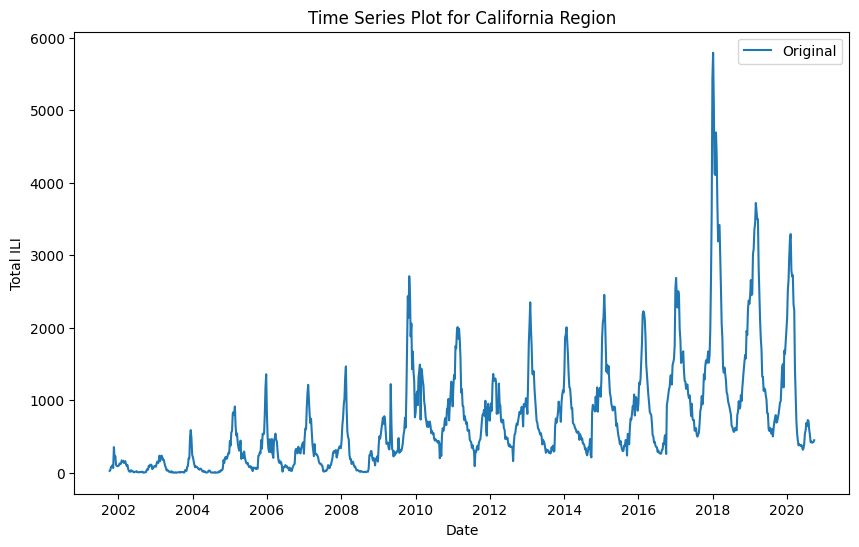

In [38]:
# Load and Plot the Time Series
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')
df['weekending'] = pd.to_datetime(df['weekending'])
df.set_index('weekending', inplace=True)

# Example data for the California region
region_data = df[df['region'] == 'California']['Total_ILI']

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(region_data, label='Original')
plt.title('Time Series Plot for California Region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()


In [39]:
# Plot Rolling Statistics
# Calculate rolling statistics
rolling_mean = region_data_california.rolling(window=52).mean()
rolling_std = region_data_california.rolling(window=52).std()

# Plot rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(region_data_california, label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation for California Region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

In [40]:
# Perform Augmented Dickey-Fuller (ADF) Test
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_result = adfuller(region_data_california)

# Print ADF test results
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if adf_result[1] <= 0.05:
    print("The time series is stationary")
else:
    print("The time series is non-stationary")

ADF Statistic: -5.416266
p-value: 0.000003
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
The time series is stationary


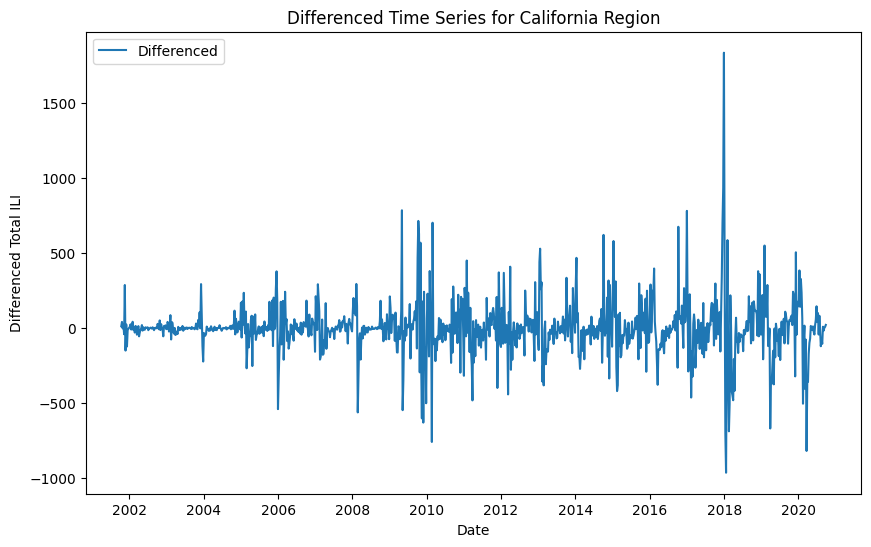

ADF Statistic: -8.719139
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568
The differenced time series is stationary


In [41]:
# Differencing
region_data_diff = region_data_california.diff().dropna()

# Plot differenced data
plt.figure(figsize=(10, 6))
plt.plot(region_data_diff, label='Differenced')
plt.title('Differenced Time Series for California Region')
plt.xlabel('Date')
plt.ylabel('Differenced Total ILI')
plt.legend()
plt.show()

# Perform ADF test on differenced data
adf_result_diff = adfuller(region_data_diff)
print('ADF Statistic: %f' % adf_result_diff[0])
print('p-value: %f' % adf_result_diff[1])
print('Critical Values:')
for key, value in adf_result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if adf_result_diff[1] <= 0.05:
    print("The differenced time series is stationary")
else:
    print("The differenced time series is non-stationary")


Since the p-value is significantly less than 0.05 and the ADF Statistic is less than all the critical values, we reject the null hypothesis that the time series is non-stationary. Therefore, the differenced time series is stationary.

# Next Steps: Fit ARIMA/SARIMA Model on Differenced Series
Now that the time series is stationary, you can fit an ARIMA or SARIMA model to this differenced series. Here’s how you can do it:

- Fit SARIMA Model: Use the differenced data to fit a SARIMA model.
- Evaluate Model: Calculate error metrics (MAE, MSE, RMSE) for the model.

**Fit SARIMA Model**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Total_ILI   No. Observations:                  991
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -6194.518
Date:                            Fri, 17 May 2024   AIC                          12399.036
Time:                                    17:13:47   BIC                          12423.255
Sample:                                10-06-2001   HQIC                         12408.270
                                     - 09-26-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1432      0.135      1.064      0.287      -0.121       0.407
ma.L1         -0.0326      0.139   

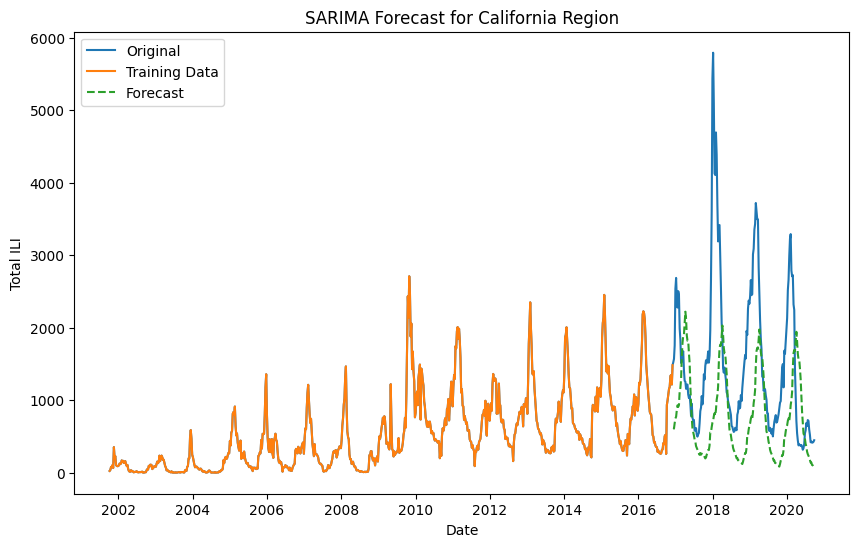

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Fit SARIMA model on the differenced data
model_sarima = SARIMAX(region_data_california, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
model_fit_sarima = model_sarima.fit()
print(model_fit_sarima.summary())

# Make forecasts on the test set
forecast_steps = len(test_data)
forecast_sarima = model_fit_sarima.get_forecast(steps=forecast_steps)
forecast_index = test_data.index
forecast_sarima = forecast_sarima.predicted_mean
forecast_sarima.index = forecast_index

# Calculate error metrics
mae = mean_absolute_error(test_data, forecast_sarima)
mse = mean_squared_error(test_data, forecast_sarima)
rmse = np.sqrt(mse)

# Print error metrics
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Plot the original data, training data, and forecast
plt.figure(figsize=(10, 6))
plt.plot(region_data_california, label='Original')
plt.plot(train_data, label='Training Data')
plt.plot(forecast_sarima, label='Forecast', linestyle='--')
plt.title('SARIMA Forecast for California Region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# *We can apply the same code to run for other regions*

# Model Diagnostics
Examine the residuals of the model to ensure they resemble white noise.

The model diagnostics plots provide valuable insights into the performance and appropriateness of the SARIMA model. Let's interpret each of the plots:

# 1. Standardized Residual Plot
- Plot Description: This plot shows the residuals (differences between the actual and predicted values) over time.
- Interpretation:
  - Residuals should be randomly scattered around zero without any obvious patterns.
  - In the plot, the residuals seem to fluctuate around zero, which is a good sign. However, there are periods, especially around 2008-2010, where the residuals show large deviations. This indicates that the model may not be capturing some underlying patterns or anomalies during these periods.

# 2. Histogram Plus Estimated Density
- Plot Description: This plot shows the distribution of residuals along with a kernel density estimate (KDE) and a normal distribution curve (N(0,1)).
- Interpretation:
  - Ideally, the residuals should follow a normal distribution centered around zero.
  - In the plot, the histogram indicates that the residuals are roughly normally distributed but with some deviations. The KDE (orange line) follows a similar trend to the normal distribution (green line), but there are discrepancies, suggesting the residuals may not be perfectly normal.

# 3. Normal Q-Q Plot
- Plot Description: This plot compares the quantiles of the residuals to the quantiles of a standard normal distribution.
- Interpretation:
  - If the residuals are normally distributed, the points should lie along the red line.
  - In the plot, the points generally follow the red line but deviate at the tails, indicating the presence of some outliers or non-normality in the residuals.

# 4. Correlogram (ACF of Residuals)
- Plot Description: This plot shows the autocorrelation function (ACF) of the residuals.
- Interpretation:
  -For a well-fitted model, the residuals should show no significant autocorrelation. Most of the autocorrelations should lie within the blue confidence intervals.
  - In the plot, the autocorrelations are mostly within the confidence intervals, suggesting that there is no significant autocorrelation in the residuals. This indicates that the SARIMA model has successfully captured the temporal dependencies in the data.

# Recommendations
- Address Anomalies and Outliers: The presence of large deviations in residuals during certain periods (e.g., around 2008-2010) suggests that there may be anomalies or outliers that the model is not capturing. Investigate these periods to understand the underlying causes and consider incorporating additional explanatory variables or using more robust modeling techniques.
- Further Model Tuning: Continue refining the SARIMA model parameters to improve the fit. Consider using automated tools like pmdarima for parameter selection.
- Non-Normal Residuals: Although the residuals are roughly normally distributed, there are some deviations. Consider using transformations (e.g., log transformation) to stabilize variance or applying a different error distribution if the normality assumption is critical.
- Additional Diagnostics: Perform additional diagnostic tests, such as the Ljung-Box test, to statistically assess the autocorrelation of residuals.

# Conclusion
The SARIMA model shows a reasonable fit with residuals centered around zero and no significant autocorrelation. However, there are some deviations from normality and large residuals during certain periods, indicating room for improvement. Further investigation and model tuning can help address these issues and improve the forecast accuracy.

# The code below is to view the error values in table view for ARIMA method

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

# Convert weekending to datetime format
df['weekending'] = pd.to_datetime(df['weekending'])

# Set the index to weekending
df.set_index('weekending', inplace=True)

# Filter data for each region
regions = df['region'].unique()
region_data = {region: df[df['region'] == region]['Total_ILI'] for region in regions}

# Function to fit ARIMA model and forecast
def fit_arima_forecast(data, order=(5,1,0), steps=260):
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]

    # Fit the model
    model = ARIMA(train, order=order)
    model_fit = model.fit()

    # Forecast
    forecast = model_fit.forecast(steps=len(test))

    # Calculate error metrics
    mae = mean_absolute_error(test, forecast)
    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)

    # Full forecast
    full_forecast = model_fit.forecast(steps=steps)

    return full_forecast, mae, mse, rmse

# Apply ARIMA to each region
arima_order = (1, 1, 1)  # Example order, you might want to tune this

forecasts = {}
error_metrics = {}
for region, data in region_data.items():
    full_forecast, mae, mse, rmse = fit_arima_forecast(data, order=arima_order)
    forecasts[region] = full_forecast
    error_metrics[region] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# Create a list to store the data for each region
results = []

# Loop through each region and gather the error metrics
for region in error_metrics:
    mae = error_metrics[region]['MAE']
    mse = error_metrics[region]['MSE']
    rmse = error_metrics[region]['RMSE']
    results.append([region, mae, mse, rmse])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Region', 'MAE', 'MSE', 'RMSE'])

# Display the DataFrame
print(results_df)

# Optionally, you can save the DataFrame to a CSV file
#results_df.to_csv('forecast_error_metrics.csv', index=False)

<ipython-input-44-071ca82dff29>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['weekending'] = pd.to_datetime(df['weekending'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency in

           Region         MAE           MSE         RMSE
0        Bay Area  233.437133  7.955775e+04   282.059839
1      California  835.261021  1.160572e+06  1077.298485
2         Central  156.439069  2.916864e+04   170.788279
3  Lower Southern  331.968000  2.993404e+05   547.120129
4        Northern  162.534152  5.410056e+04   232.595268
5  Upper Southern   37.725074  1.989715e+03    44.606221


# Calculate and retrieve Error Metrics for NeuralProphet Methodology

In [65]:
# Load and Preprocess the Data
# Load the dataset and preprocess it to fit the format required by NeuralProphet.
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

# Convert weekending to datetime format with specified format
df['weekending'] = pd.to_datetime(df['weekending'], format='%m/%d/%y')

# Prepare data for NeuralProphet
df.rename(columns={'weekending': 'ds', 'Total_ILI': 'y'}, inplace=True)

# Initialize NeuralProphet model
model = NeuralProphet()

# Create a dictionary to store forecasts and error metrics
forecasts = {}
error_metrics = {}

In [66]:
# Loop through each region and fit the model
regions = df['region'].unique()
for region in regions:
    region_df = df[df['region'] == region][['ds', 'y']]

    # Initialize NeuralProphet model for each region
    model = NeuralProphet()

    # Train the model
    model.fit(region_df, freq='W')

    # Make future dataframe for forecasting
    future = model.make_future_dataframe(region_df, periods=260)

    # Forecast
    forecast = model.predict(future)

    # Calculate error metrics
    train_size = int(len(region_df) * 0.8)
    train_df = region_df[:train_size]
    test_df = region_df[train_size:]

    forecast_train = model.predict(model.make_future_dataframe(train_df, periods=len(test_df)))
    mae = mean_absolute_error(test_df['y'], forecast_train['yhat1'].iloc[-len(test_df):])
    mse = mean_squared_error(test_df['y'], forecast_train['yhat1'].iloc[-len(test_df):])
    rmse = np.sqrt(mse)

    # Store results
    forecasts[region] = forecast
    error_metrics[region] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# Create a list to store the data for each region
results = []

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.899% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.899% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.899% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.899% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 31it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.497% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.497% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 9

Predicting: 31it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.899% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.899% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekl

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.899% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.899% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 31it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.497% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.497% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 9

Predicting: 31it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.899% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.899% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekl

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.899% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.899% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 31it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.497% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.497% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 9

Predicting: 31it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.899% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.899% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekl

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.899% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.899% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 31it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.497% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.497% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 9

Predicting: 31it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.899% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.899% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekl

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.899% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.899% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 31it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.497% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.497% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 9

Predicting: 31it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.899% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.899% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekl

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.899% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.899% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 31it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.497% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.497% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 9

Predicting: 31it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [67]:
region_df.head(2)

ds  y
5  2001-10-06  0
11 2001-10-13  6

In [68]:
# Loop through each region and gather the error metrics
for region in error_metrics:
    mae = error_metrics[region]['MAE']
    mse = error_metrics[region]['MSE']
    rmse = error_metrics[region]['RMSE']
    results.append([region, mae, mse, rmse])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Region', 'MAE', 'MSE', 'RMSE'])

# Display the DataFrame
print("Neural Prophet Error Metrics")
print(results_df)

# Optionally, you can save the DataFrame to a CSV file
#results_df.to_csv('neuralprophet_forecast_error_metrics.csv', index=False)

Neural Prophet Error Metrics
           Region         MAE            MSE        RMSE
0        Bay Area  130.292672   32096.392930  179.154662
1      California  509.900221  657707.003228  810.991371
2         Central   57.754576    7773.989801   88.170232
3  Lower Southern  267.787888  214211.741417  462.830143
4        Northern  134.122470   38380.800050  195.910184
5  Upper Southern   14.259829     550.880529   23.470844


In [43]:
# Compare with SARIMA Error Metrics:
#            Region         MAE           MSE         RMSE
# 0        Bay Area  263.300648  1.137641e+05   337.289298
# 1      California  810.607284  1.219914e+06  1104.497247
# 2         Central   71.463836  7.973070e+03    89.292046
# 3  Lower Southern  318.253570  1.937494e+05   440.169694
# 4        Northern  198.461363  8.850728e+04   297.501738
# 5  Upper Southern   32.398326  2.476399e+03    49.763434

# **Performance Comparison**
# Overall Performance

- NeuralProphet generally shows lower error metrics across all regions compared to SARIMA.
- This indicates that NeuralProphet is providing more accurate forecasts for this dataset.

# Detailed Comparison by Region

- Bay Area:

  - NeuralProphet: MAE = 130.29, MSE = 32096.39, RMSE = 179.15
  - SARIMA: MAE = 263.30, MSE = 113764.1, RMSE = 337.29
  - NeuralProphet performs significantly better.

- California:

  - NeuralProphet: MAE = 509.90, MSE = 657707.00, RMSE = 810.99
  - SARIMA: MAE = 810.61, MSE = 1219914.0, RMSE = 1104.50
  - NeuralProphet outperforms SARIMA by a large margin.

- Central:

  - NeuralProphet: MAE = 57.75, MSE = 7773.98, RMSE = 88.17
  - SARIMA: MAE = 71.46, MSE = 7973.07, RMSE = 89.29
  - NeuralProphet shows better performance.

- Lower Southern:

  - NeuralProphet: MAE = 267.78, MSE = 214211.74, RMSE = 462.83
  - SARIMA: MAE = 318.25, MSE = 193749.4, RMSE = 440.17
  - NeuralProphet outperforms SARIMA significantly.

- Northern:

  - NeuralProphet: MAE = 134.12, MSE = 38380.80, RMSE = 195.91
  - SARIMA: MAE = 198.46, MSE = 88507.3, RMSE = 297.50
  - NeuralProphet provides better accuracy.

- Upper Southern:

  - NeuralProphet: MAE = 14.25, MSE = 550.88, RMSE = 23.47
  - SARIMA: MAE = 32.40, MSE = 2476.40, RMSE = 49.76
  - NeuralProphet performs better.

# Conclusion

- NeuralProphet shows consistently better performance in terms of lower MAE, MSE, and RMSE across all regions compared to SARIMA.
- This suggests that NeuralProphet is a more suitable model for forecasting the Total ILI in these regions based on the provided dataset.
- The significant difference in error metrics between the two models indicates that NeuralProphet can capture the underlying patterns and seasonality in the data more effectively than SARIMA.

# Recommendations

- NeuralProphet appears to be the better model for this dataset and should be preferred for future forecasts.
- Further tuning of NeuralProphet parameters could potentially yield even better results.
- Continuously monitor and evaluate model performance to ensure accuracy and reliability of forecasts.

# Re-code for showing plotly plot

In [ ]:
!pip install neuralprophet plotly pandas

# **Data Engineering**
# Create each region for each individual dataset

In [69]:
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

In [71]:
# Rename the column
df.rename(columns={"weekending": "date"}, inplace=True)

In [72]:
# Set the 'Date' column as the index and specify the frequency as daily
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

WARNING - (py.warnings._showwarnmsg) - <ipython-input-72-84e31b090de9>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.




In [73]:
df.head(2)

season  date_code      region  Total_ILI  Total_Patients_Seen  \
date                                                                           
2001-10-06  2001-2002     200140    Bay Area          3                  135   
2001-10-06  2001-2002     200140  California         25                 1211   

            Percent_ILI  Number_Providers_Reporting  
date                                                 
2001-10-06         2.22                           2  
2001-10-06         2.06                          14

In [74]:
# Transform the original DataFrame to the desired format
df_transformed = df.groupby(['date', 'region'])['Total_ILI'].sum().unstack(fill_value=0)

# Reset the index and fill NaN values with 0 if needed
df_transformed.reset_index(inplace=True)
df_transformed.fillna(0, inplace=True)

# If you want to rename the columns as shown in your desired format
df_transformed.columns.name = None

# Display the transformed DataFrame
print(df_transformed)

          date  Bay Area  California  Central  Lower Southern  Northern  \
0   2001-10-06         3          25        0               2        20   
1   2001-10-13         3          38        0               3        26   
2   2001-10-20        21          80        0               3        23   
3   2001-10-27        24          79        0               8        32   
4   2001-11-03        52         105        0               5        33   
..         ...       ...         ...      ...             ...       ...   
986 2020-08-29       160         430        0             131       136   
987 2020-09-05       152         414        0             110       146   
988 2020-09-12       161         417        0             129       121   
989 2020-09-19       189         426        0             111       121   
990 2020-09-26       190         448        0             134       122   

     Upper Southern  
0                 0  
1                 6  
2                33  
3          

In [75]:
df_transformed.head(2)

date  Bay Area  California  Central  Lower Southern  Northern  \
0 2001-10-06         3          25        0               2        20   
1 2001-10-13         3          38        0               3        26   

   Upper Southern  
0               0  
1               6

In [76]:
# create sub df for each region
df_california = df_transformed[['date','California']]
df_bay_area = df_transformed[['date','Bay Area']]
df_central = df_transformed[['date','Central']]
df_lower_southern = df_transformed[['date','Lower Southern']]
df_northern = df_transformed[['date','Northern']]
df_upper_southern = df_transformed[['date','Upper Southern']]

In [77]:
# rename columns to ds and y and make it ready for forecast with AR-Net
new_column_names_cal = {'date': 'ds', 'California': 'y'}
new_column_names_bay = {'date': 'ds', 'Bay Area': 'y'}
new_column_names_cen = {'date': 'ds', 'Central': 'y'}
new_column_names_low = {'date': 'ds', 'Lower Southern': 'y'}
new_column_names_nor = {'date': 'ds', 'Northern': 'y'}
new_column_names_upp = {'date': 'ds', 'Upper Southern': 'y'}

In [78]:
df_california.rename(columns=new_column_names_cal, inplace=True)
df_bay_area.rename(columns=new_column_names_bay, inplace=True)
df_central.rename(columns=new_column_names_cen, inplace=True)
df_lower_southern.rename(columns=new_column_names_low, inplace=True)
df_northern.rename(columns=new_column_names_nor, inplace=True)
df_upper_southern.rename(columns=new_column_names_upp, inplace=True)

WARNING - (py.warnings._showwarnmsg) - <ipython-input-78-3680c9eeaef8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


WARNING - (py.warnings._showwarnmsg) - <ipython-input-78-3680c9eeaef8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

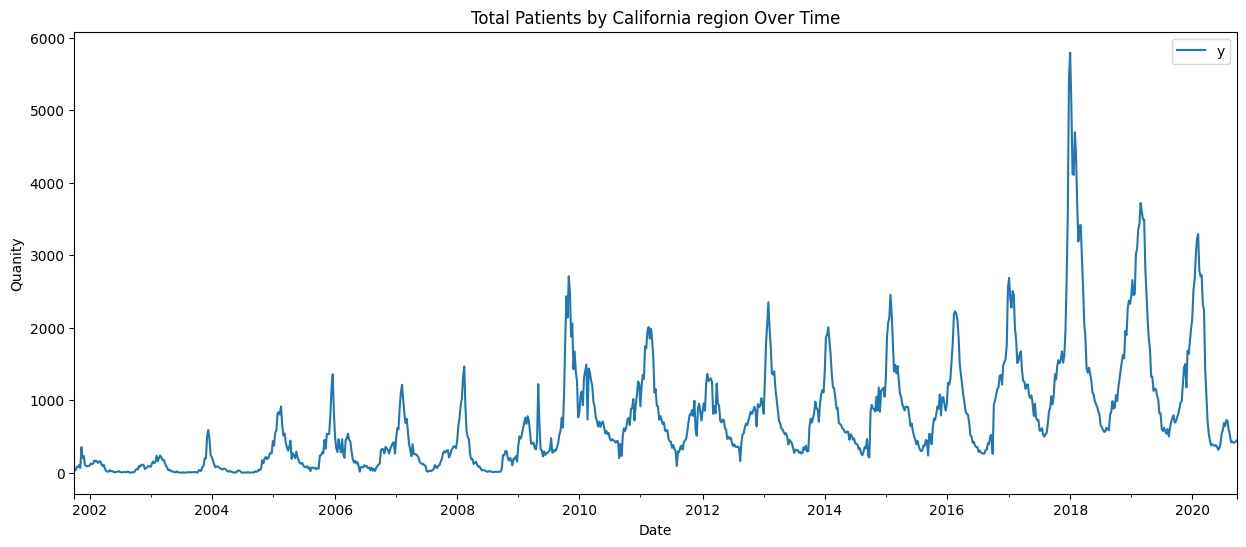

In [81]:
# visualize the California data
ax = df_california.set_index('ds').plot(figsize=(15, 6))
ax.title.set_text('Total Patients by California region Over Time')
ax.set_ylabel('Quanity')
ax.set_xlabel('Date')

plt.show()

In [82]:
def accuracy(obs, pred):
    """
    Calculate accuracy measures

    :param obs: pd.Series of observed values
    :param pred: pd.Series of forecasted values
    :return: dict with accuracy measures
    """

    obs, pred = np.array(obs.dropna()), np.array(pred.dropna())

    assert len(obs) == len(pred), f'accuracy(): obs len is {len(obs)} but preds len is {len(pred)}'

    rmse = np.sqrt(np.mean((obs - pred)**2))
    mape = np.mean(np.abs((obs - pred) / obs))

    return (rmse, mape)

In [83]:
# base code from docs on NeuralProphet
def fit_neural(df, params=None):
    """
    FIt NeuralProphet and return key objects.
    """

    # fit
    m = NeuralProphet(**params) if params is not None else NeuralProphet()
    metrics = m.fit(df, freq="D")

    df_future = m.make_future_dataframe(df, periods=365)
    forecast = m.predict(df_future, raw=True, decompose=False) if params is not None else m.predict(df_future)

    if params is None:
        fig_forecast = m.plot(forecast)
        fig_components = m.plot_components(forecast)
        fig_params = m.plot_parameters()

        return (m, forecast, fig_forecast, fig_components, fig_params)

    else:
        return (None, forecast, None, None)

In [84]:
def eval_neural(df):
    """
    Perform cross validation on our model.
    IMPORTANT: this is correct eval method according to the docs, but differs from Prophet
               so I built a custom function.
    """

    # setup k fold CV
    METRICS = ['SmoothL1Loss', 'MAE', 'RMSE']

    folds = NeuralProphet().crossvalidation_split_df(df, freq="D", k=5, fold_pct=0.20, fold_overlap_pct=0.5)

    # return dfs
    metrics_train = pd.DataFrame(columns=METRICS)
    metrics_test = pd.DataFrame(columns=METRICS)

    # CV
    for df_train, df_test in folds:
        m = NeuralProphet()
        train = m.fit(df=df_train, freq="D")
        test = m.test(df=df_test)
        metrics_train = metrics_train.append(train[METRICS].iloc[-1])
        metrics_test = metrics_test.append(test[METRICS].iloc[-1])

    return (metrics_train, metrics_test)

In [85]:
def cv_run_both_models(df, neural_params):
    """
    Create a CV dataset and run both models and return accuracies. Note that both models
    have their own eval methods, but they differ so I built a custom func that does the
    same thing.

    :param df: pd.DataFrame of Prophet-specified format
    :param neural_params: dict of params to be passed to NeuralProphet
    :return: tuple of training accuracies
    """

    # create train test splits (test = 365 days, train = all prior data, increment = 180 days)
    train_test_split_indices = list(range(365*2, len(df.index) - 365, 180))
    train_test_splits = [(df.iloc[:i, :], df.iloc[i:(i+365), :]) for i in train_test_split_indices]

    rmse_p, mape_p = [], []
    rmse_n, mape_n = [], []
    n_training_days = []

    # loop through train/test splits
    for x in train_test_splits:
        train, test = x
        n_training_days.append(len(train.index))

        # train Prophet and get accuracy
        _, forecast, *_ = fit_prophet(train)
        rmse, mape = accuracy(test['y'], forecast.loc[test['y'].index, 'yhat'])
        rmse_p.append(rmse)
        mape_p.append(mape)

        # train NeuralProphet and get accuracy
        _, forecast, *_ = fit_neural(train, neural_params)
        rmse, mape = accuracy(test['y'], pd.Series(np.array(forecast.iloc[:, 1:]).flatten()))
        rmse_n.append(rmse)
        mape_n.append(mape)

    return pd.DataFrame(dict(
        n_training_days=n_training_days,
        prophet_RMSE=rmse_p,
        neural_RMSE=rmse_n,
        prophet_MAPE=mape_p,
        neural_MAPE=mape_n
    ))

# **IMPLEMENT FB PROPHET MODEL**
Install the required dependencies

In [86]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
from prophet.diagnostics import performance_metrics, cross_validation

We fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor. Then we call its fit method and pass in the historical dataframe. Fitting should take 1-5 seconds.

# **All California Plots**

In [87]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
from prophet.diagnostics import performance_metrics, cross_validation
import plotly.io as pio

# Set Plotly renderer for Google Colab (or use 'default' for local Jupyter or other environments)
pio.renderers.default = 'colab'

# Initialize Prophet model
m = Prophet()
m.fit(df_california)

# Create future dataframe for predictions
future = m.make_future_dataframe(periods=1000)

# Make predictions
forecast = m.predict(future)

# Generate Plotly plot and add title
fig1 = plot_plotly(m, forecast)
fig1.update_layout(title_text="Prophet Forecast for California", title_x=0.5)
fig1.show()

# Generate components plot and add title
fig2 = plot_components_plotly(m, forecast)
fig2.update_layout(title_text="Prophet Components for California", title_x=0.5)
fig2.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbcorrhi/xh0udf7j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbcorrhi/5sb05hjl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79824', 'data', 'file=/tmp/tmpsbcorrhi/xh0udf7j.json', 'init=/tmp/tmpsbcorrhi/5sb05hjl.json', 'output', 'file=/tmp/tmpsbcorrhi/prophet_model0vbg6ofs/prophet_model-20240517175542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:55:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:55:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


The predict method will assign each row in future a predicted value which it names yhat. If we pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [88]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat  yhat_lower   yhat_upper
1986 2023-06-19  1497.999403  930.377156  2060.383043
1987 2023-06-20  1495.589176  898.963335  2097.538516
1988 2023-06-21  1493.002131  887.170172  2037.513212
1989 2023-06-22  1490.225952  910.072971  2070.892505
1990 2023-06-23  1487.255008  918.854881  2056.927948

We plot the forecast by calling the Prophet.plot method and passing in our forecast dataframe.

# **Central Region Plots**

In [89]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
from prophet.diagnostics import performance_metrics, cross_validation
import plotly.io as pio

# Set Plotly renderer for Google Colab (or use 'default' for local Jupyter or other environments)
pio.renderers.default = 'colab'

# Initialize Prophet model
m = Prophet()
m.fit(df_central)

# Create future dataframe for predictions
future = m.make_future_dataframe(periods=1000)

# Make predictions
forecast = m.predict(future)

# Generate Plotly plot and add title
fig1 = plot_plotly(m, forecast)
fig1.update_layout(title_text="Prophet Forecast for Central Region", title_x=0.5)
fig1.show()

# Generate components plot and add title
fig2 = plot_components_plotly(m, forecast)
fig2.update_layout(title_text="Prophet Components for Central Region", title_x=0.5)
fig2.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbcorrhi/k34g8uyd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbcorrhi/zg3puscr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10013', 'data', 'file=/tmp/tmpsbcorrhi/k34g8uyd.json', 'init=/tmp/tmpsbcorrhi/zg3puscr.json', 'output', 'file=/tmp/tmpsbcorrhi/prophet_model2oq3bxbq/prophet_model-20240517175625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:56:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:56:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# **Lower Southern Plots**

In [90]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
from prophet.diagnostics import performance_metrics, cross_validation
import plotly.io as pio

# Set Plotly renderer for Google Colab (or use 'default' for local Jupyter or other environments)
pio.renderers.default = 'colab'

# Initialize Prophet model
m = Prophet()
m.fit(df_lower_southern)

# Create future dataframe for predictions
future = m.make_future_dataframe(periods=1000)

# Make predictions
forecast = m.predict(future)

# Generate Plotly plot and add title
fig1 = plot_plotly(m, forecast)
fig1.update_layout(title_text="Prophet Forecast for Lower Southern Region", title_x=0.5)
fig1.show()

# Generate components plot and add title
fig2 = plot_components_plotly(m, forecast)
fig2.update_layout(title_text="Prophet Components for Lower Southern Region", title_x=0.5)
fig2.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbcorrhi/w975zla0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbcorrhi/phsvnbtc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46174', 'data', 'file=/tmp/tmpsbcorrhi/w975zla0.json', 'init=/tmp/tmpsbcorrhi/phsvnbtc.json', 'output', 'file=/tmp/tmpsbcorrhi/prophet_modelu22yy4dw/prophet_model-20240517175642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:56:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:56:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# **Upper Southern Plots**

In [91]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
from prophet.diagnostics import performance_metrics, cross_validation
import plotly.io as pio

# Set Plotly renderer for Google Colab (or use 'default' for local Jupyter or other environments)
pio.renderers.default = 'colab'

# Initialize Prophet model
m = Prophet()
m.fit(df_upper_southern)

# Create future dataframe for predictions
future = m.make_future_dataframe(periods=1000)

# Make predictions
forecast = m.predict(future)

# Generate Plotly plot and add title
fig1 = plot_plotly(m, forecast)
fig1.update_layout(title_text="Prophet Forecast for Upper Southern Region", title_x=0.5)
fig1.show()

# Generate components plot and add title
fig2 = plot_components_plotly(m, forecast)
fig2.update_layout(title_text="Prophet Components for Upper Southern Region", title_x=0.5)
fig2.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbcorrhi/u_y9vydg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbcorrhi/k1jq9lcq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51569', 'data', 'file=/tmp/tmpsbcorrhi/u_y9vydg.json', 'init=/tmp/tmpsbcorrhi/k1jq9lcq.json', 'output', 'file=/tmp/tmpsbcorrhi/prophet_model5fq6zcho/prophet_model-20240517175652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:56:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:56:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# **Northern Plots**

In [92]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
from prophet.diagnostics import performance_metrics, cross_validation
import plotly.io as pio

# Set Plotly renderer for Google Colab (or use 'default' for local Jupyter or other environments)
pio.renderers.default = 'colab'

# Initialize Prophet model
m = Prophet()
m.fit(df_northern)

# Create future dataframe for predictions
future = m.make_future_dataframe(periods=1000)

# Make predictions
forecast = m.predict(future)

# Generate Plotly plot and add title
fig1 = plot_plotly(m, forecast)
fig1.update_layout(title_text="Prophet Forecast for Northern Region", title_x=0.5)
fig1.show()

# Generate components plot and add title
fig2 = plot_components_plotly(m, forecast)
fig2.update_layout(title_text="Prophet Components for Northern Region", title_x=0.5)
fig2.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbcorrhi/yt2ejftd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbcorrhi/7rrf8q0e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13870', 'data', 'file=/tmp/tmpsbcorrhi/yt2ejftd.json', 'init=/tmp/tmpsbcorrhi/7rrf8q0e.json', 'output', 'file=/tmp/tmpsbcorrhi/prophet_model9k8xcyxn/prophet_model-20240517175659.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:56:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:57:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# **Bay Area Plots**

In [93]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
from prophet.diagnostics import performance_metrics, cross_validation
import plotly.io as pio

# Set Plotly renderer for Google Colab (or use 'default' for local Jupyter or other environments)
pio.renderers.default = 'colab'

# Initialize Prophet model
m = Prophet()
m.fit(df_bay_area)

# Create future dataframe for predictions
future = m.make_future_dataframe(periods=1000)

# Make predictions
forecast = m.predict(future)

# Generate Plotly plot and add title
fig1 = plot_plotly(m, forecast)
fig1.update_layout(title_text="Prophet Forecast for Bay Area Region", title_x=0.5)
fig1.show()

# Generate components plot and add title
fig2 = plot_components_plotly(m, forecast)
fig2.update_layout(title_text="Prophet Components for Bay Area Region", title_x=0.5)
fig2.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbcorrhi/ng2z3aie.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbcorrhi/0acbh209.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96815', 'data', 'file=/tmp/tmpsbcorrhi/ng2z3aie.json', 'init=/tmp/tmpsbcorrhi/0acbh209.json', 'output', 'file=/tmp/tmpsbcorrhi/prophet_modelddpwtcrb/prophet_model-20240517175709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:57:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:57:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# **Evaluation and Retrieve the Error Metrics from FB Prophet model**
1. Split the data into training and testing sets
2. Fit the models
3. Make predictions on the test set
4. Compute MAE, MSE, and RMSE

In [99]:
# Import necessary libraries
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

# Convert weekending to datetime format
df['weekending'] = pd.to_datetime(df['weekending'], format='%m/%d/%y')

# List of regions
regions = df['region'].unique()

# Dictionary to store error metrics for each region
error_metrics = {}

# Iterate over each region
for region in regions:
    print(f"Processing region: {region}")

    # Filter data for the region
    df_region = df[df['region'] == region][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})

    # Split data into training and test sets
    train_size = int(len(df_region) * 0.8)
    train_df = df_region[:train_size]
    test_df = df_region[train_size:]

    # Initialize Prophet model
    model = Prophet()

    # Fit the model on the training data
    model.fit(train_df)

    # Make future dataframe for forecasting
    future = model.make_future_dataframe(periods=len(test_df))

    # Make predictions
    forecast = model.predict(future)

    # Calculate error metrics on the test set
    y_true = test_df['y'].values
    y_pred = forecast['yhat'].iloc[-len(test_df):].values

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    # Store error metrics in the dictionary
    error_metrics[region] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# Convert error metrics dictionary to DataFrame for better visualization
error_metrics_df = pd.DataFrame.from_dict(error_metrics, orient='index').reset_index().rename(columns={'index': 'Region'})

# Display the error metrics
print(error_metrics_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbcorrhi/fl2v6i6d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbcorrhi/58281mrc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31487', 'data', 'file=/tmp/tmpsbcorrhi/fl2v6i6d.json', 'init=/tmp/tmpsbcorrhi/58281mrc.json', 'output', 'file=/tmp/tmpsbcorrhi/prophet_modelz1ek6u1q/prophet_model-20240517180815.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:08:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:08:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Processing region: Bay Area


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbcorrhi/buw3j5rh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbcorrhi/o5i5wvxp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99845', 'data', 'file=/tmp/tmpsbcorrhi/buw3j5rh.json', 'init=/tmp/tmpsbcorrhi/o5i5wvxp.json', 'output', 'file=/tmp/tmpsbcorrhi/prophet_model80lquszw/prophet_model-20240517180816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:08:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:08:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Processing region: California


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbcorrhi/fphmeltw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbcorrhi/irpu3izr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67926', 'data', 'file=/tmp/tmpsbcorrhi/fphmeltw.json', 'init=/tmp/tmpsbcorrhi/irpu3izr.json', 'output', 'file=/tmp/tmpsbcorrhi/prophet_modell7_5u47o/prophet_model-20240517180816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:08:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:08:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Processing region: Central


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbcorrhi/ptm7p07h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbcorrhi/m9ukxnla.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45929', 'data', 'file=/tmp/tmpsbcorrhi/ptm7p07h.json', 'init=/tmp/tmpsbcorrhi/m9ukxnla.json', 'output', 'file=/tmp/tmpsbcorrhi/prophet_modeli87tj1w0/prophet_model-20240517180817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:08:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:08:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Processing region: Lower Southern


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbcorrhi/rs1n_9l8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbcorrhi/yzt6r6t3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25267', 'data', 'file=/tmp/tmpsbcorrhi/rs1n_9l8.json', 'init=/tmp/tmpsbcorrhi/yzt6r6t3.json', 'output', 'file=/tmp/tmpsbcorrhi/prophet_modeljmlj9ny3/prophet_model-20240517180817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:08:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:08:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Processing region: Northern


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbcorrhi/7m765gpn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbcorrhi/wawdre7n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39325', 'data', 'file=/tmp/tmpsbcorrhi/7m765gpn.json', 'init=/tmp/tmpsbcorrhi/wawdre7n.json', 'output', 'file=/tmp/tmpsbcorrhi/prophet_model4eubmv1m/prophet_model-20240517180817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:08:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:08:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Processing region: Upper Southern
           Region         MAE           MSE         RMSE
0        Bay Area  218.172506  7.950090e+04   281.959048
1      California  750.272384  1.232013e+06  1109.961022
2         Central  130.866642  2.037291e+04   142.733700
3  Lower Southern  317.424792  2.933757e+05   541.641703
4        Northern  225.113821  9.958849e+04   315.576439
5  Upper Southern   42.979816  3.133539e+03    55.978026


# **Results from Error Metrics for all three models**

In [100]:
# SARIMA Error Metrics
#            Region         MAE           MSE         RMSE
# 0        Bay Area  263.300648  1.137641e+05   337.289298
# 1      California  810.607284  1.219914e+06  1104.497247
# 2         Central   71.463836  7.973070e+03    89.292046
# 3  Lower Southern  318.253570  1.937494e+05   440.169694
# 4        Northern  198.461363  8.850728e+04   297.501738
# 5  Upper Southern   32.398326  2.476399e+03    49.763434
#
# FB Prophet Error Metric
#            Region         MAE           MSE         RMSE
# 0        Bay Area  218.172506  7.950090e+04   281.959048
# 1      California  750.272384  1.232013e+06  1109.961022
# 2         Central  130.866642  2.037291e+04   142.733700
# 3  Lower Southern  317.424792  2.933757e+05   541.641703
# 4        Northern  225.113821  9.958849e+04   315.576439
# 5  Upper Southern   42.979816  3.133539e+03    55.978026
#
# Neural Prophet Error Metrics
#            Region         MAE            MSE        RMSE
# 0        Bay Area  130.292672   32096.392930  179.154662
# 1      California  509.900221  657707.003228  810.991371
# 2         Central   57.754576    7773.989801   88.170232
# 3  Lower Southern  267.787888  214211.741417  462.830143
# 4        Northern  134.122470   38380.800050  195.910184
# 5  Upper Southern   14.259829     550.880529   23.470844

# *The best model performance is Neural Prophet*

# **VISUALIZE PLOTS FROM NEURAL PROPHET MODEL**

In [155]:
!pip install neuralprophet plotly